# Capital Strenght Analyst

## A. Business Understanding

## B. Data Understanding

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# import data
df = pd.read_csv('../dataset/dummy_capital_5.csv')

In [3]:
# # import data
# from google.colab import drive
# drive.mount('/content/gdrive')

In [4]:
# df = pd.read_csv('/content/gdrive/MyDrive/Dataset/dummy_capital_5.csv')
# df.head()

In [5]:
df.shape

(100, 69)

In [6]:
# drop columns
df = df[['debt_to_equity_ratio','debt_to_equity_ratio_cat', 'debt_to_asset_ratio', 'debt_to_asset_ratio_cat', 'accounts_receivable_turnover', 'accounts_receivable_turnover_cat','Inventory_turnover','Inventory_turnover_cat','return_on_assets','return_on_assets_cat','interest_coverage_ratio','interest_coverage_ratio_cat','accounts_payable_turnover','Accounts_payable_turnover_cat','Customer_concentration','competitor_activity','economic_growth','Inflation','stock_market_performance','Market_conditions','Gross_profit_margin','Gross_profit_margin_cat','cash_flow_operation_cat','cash_flow_financing_cat','cash_flow_invest_cat','cash_flow','credit_scoring']]
df.head()

,debt_to_equity_ratio,debt_to_equity_ratio_cat,debt_to_asset_ratio,debt_to_asset_ratio_cat,accounts_receivable_turnover,accounts_receivable_turnover_cat,Inventory_turnover,Inventory_turnover_cat,return_on_assets,return_on_assets_cat,...,Inflation,stock_market_performance,Market_conditions,Gross_profit_margin,Gross_profit_margin_cat,cash_flow_operation_cat,cash_flow_financing_cat,cash_flow_invest_cat,cash_flow,credit_scoring
0,0.12,excellent,0.110,good,7.43,excellent,6.22,excellent,0.005,efesien,...,>10% (high),Bull market (pasar saham naik),Bullish market,0.04,excellent,Positive Cash Flow,Positive Cash Flow,Positive Cash Flow,Positive Cash Flow,98.0
1,0.10,excellent,0.095,good,6.04,excellent,6.68,excellent,0.003,efesien,...,>10% (high),Bull market (pasar saham naik),Bullish market,0.02,good,Positive Cash Flow,Positive Cash Flow,Positive Cash Flow,Positive Cash Flow,94.0
2,0.06,excellent,0.060,excellent,15.00,excellent,6.43,excellent,0.003,efesien,...,>10% (high),Bull market (pasar saham naik),Bullish market,0.02,good,Positive Cash Flow,Positive Cash Flow,Positive Cash Flow,Positive Cash Flow,96.0
3,0.33,excellent,0.246,good,6.55,excellent,1.25,good,0.003,efesien,...,>10% (high),Bull market (pasar saham naik),Bullish market,0.01,good,Positive Cash Flow,Positive Cash Flow,Positive Cash Flow,Positive Cash Flow,90.0
4,0.02,excellent,0.018,excellent,10.00,excellent,5.95,excellent,0.006,efesien,...,>10% (high),Bull market (pasar saham naik),Bullish market,0.02,good,Positive Cash Flow,Positive Cash Flow,Positive Cash Flow,Positive Cash Flow,96.0


In [7]:
# rename columns name
# df.rename(columns={
#     'collateral_value_of_on_site_assets': 'collateral_value',
#     'average_loans_taken_in_the_same_location': 'average_loans_taken',
#     'average_income_of_the_population_in_the_area': 'area_average_income',
#     'education_of_the_population_in_the_area': 'area_education',
#     'unemployment_rate_in_the_area': 'area_unemployment_rate',
#     'crime_rate_in_the_area': 'area_crime_rate',
#     'poverty_rate_in_the_area': 'area_poverty_rate',
#     'length_of_stay_at_domicile_address': 'length_of_stay',
#     'domicile_address_and_location_suitability': 'location_suitability',
#     }, inplace=True)

In [8]:
numerical_cols = ['debt_to_equity_ratio', 'debt_to_asset_ratio','accounts_receivable_turnover','Inventory_turnover','return_on_assets','interest_coverage_ratio','accounts_payable_turnover','Gross_profit_margin']
categorical_cols = ['debt_to_equity_ratio_cat', 'debt_to_asset_ratio_cat', 'accounts_receivable_turnover_cat', 'Inventory_turnover_cat', 'return_on_assets_cat', 'interest_coverage_ratio_cat', 'Accounts_payable_turnover_cat', 'Customer_concentration', 'competitor_activity', 'economic_growth', 'Inflation','stock_market_performance','Market_conditions','Gross_profit_margin_cat','cash_flow_operation_cat','cash_flow_financing_cat','cash_flow_invest_cat','cash_flow']
target_cols = 'credit_scoring'

In [9]:
df.sample(5)

,debt_to_equity_ratio,debt_to_equity_ratio_cat,debt_to_asset_ratio,debt_to_asset_ratio_cat,accounts_receivable_turnover,accounts_receivable_turnover_cat,Inventory_turnover,Inventory_turnover_cat,return_on_assets,return_on_assets_cat,...,Inflation,stock_market_performance,Market_conditions,Gross_profit_margin,Gross_profit_margin_cat,cash_flow_operation_cat,cash_flow_financing_cat,cash_flow_invest_cat,cash_flow,credit_scoring
4,0.02,excellent,0.018,excellent,10.00,excellent,5.95,excellent,0.006,efesien,...,>10% (high),Bull market (pasar saham naik),Bullish market,0.02,good,Positive Cash Flow,Positive Cash Flow,Positive Cash Flow,Positive Cash Flow,96.0
51,0.60,good,0.376,good,4.10,good,1.88,good,0.008,efesien,...,3%-10% (medium),Sideways market (pasar saham datar),Sideways market,0.02,good,Positive Cash Flow,Positive Cash Flow,Positive Cash Flow,Positive Cash Flow,69.0
89,-11.45,bad,1.096,bad,0.13,bad,0.50,bad,-0.008,tidak efesien,...,<3% (low),Bear market,Bearish market,-0.02,bad,Negative Cash Flow,Negative Cash Flow,Negative Cash Flow,Negative Cash Flow,25.5
21,0.05,excellent,0.049,excellent,8.10,excellent,9.22,excellent,0.001,efesien,...,>10% (high),Bull market (pasar saham naik),Bullish market,0.02,good,Positive Cash Flow,Positive Cash Flow,Positive Cash Flow,Positive Cash Flow,96.0
25,0.09,excellent,0.079,good,7.00,excellent,2.73,good,0.012,efesien,...,>10% (high),Bull market (pasar saham naik),Bullish market,0.07,excellent,Positive Cash Flow,Positive Cash Flow,Positive Cash Flow,Positive Cash Flow,94.0


In [10]:
df.columns

Index(['debt_to_equity_ratio', 'debt_to_equity_ratio_cat',
       'debt_to_asset_ratio', 'debt_to_asset_ratio_cat',
       'accounts_receivable_turnover', 'accounts_receivable_turnover_cat',
       'Inventory_turnover', 'Inventory_turnover_cat', 'return_on_assets',
       'return_on_assets_cat', 'interest_coverage_ratio',
       'interest_coverage_ratio_cat', 'accounts_payable_turnover',
       'Accounts_payable_turnover_cat', 'Customer_concentration',
       'competitor_activity', 'economic_growth', 'Inflation',
       'stock_market_performance', 'Market_conditions', 'Gross_profit_margin',
       'Gross_profit_margin_cat', 'cash_flow_operation_cat',
       'cash_flow_financing_cat', 'cash_flow_invest_cat', 'cash_flow',
       'credit_scoring'],
      dtype='object')

### Exploratory Data Analysis: Descriptive Statistics

In [11]:
# melihat bentuk data
df.shape

(100, 27)

In [12]:
# cek informasi data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 27 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   debt_to_equity_ratio              100 non-null    float64
 1   debt_to_equity_ratio_cat          100 non-null    object 
 2   debt_to_asset_ratio               100 non-null    float64
 3   debt_to_asset_ratio_cat           100 non-null    object 
 4   accounts_receivable_turnover      100 non-null    float64
 5   accounts_receivable_turnover_cat  100 non-null    object 
 6   Inventory_turnover                100 non-null    float64
 7   Inventory_turnover_cat            100 non-null    object 
 8   return_on_assets                  100 non-null    float64
 9   return_on_assets_cat              100 non-null    object 
 10  interest_coverage_ratio           100 non-null    float64
 11  interest_coverage_ratio_cat       100 non-null    object 
 12  accounts_

In [13]:
# melihat statistik deskriptif
df.describe()

,debt_to_equity_ratio,debt_to_asset_ratio,accounts_receivable_turnover,Inventory_turnover,return_on_assets,interest_coverage_ratio,accounts_payable_turnover,Gross_profit_margin,credit_scoring
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,-0.214900,0.624480,3.674800,4.265300,-0.011497,5.065500,2.141600,-0.017100,62.000000
std,3.565831,0.817216,4.217251,13.265313,0.040593,6.055208,2.063163,0.095201,26.957318
min,-13.880000,0.006000,0.030000,0.020000,-0.220000,-3.060000,0.100000,-0.610000,25.500000
25%,0.040000,0.116750,0.565000,0.975000,-0.013250,0.517500,0.427500,-0.020000,30.000000
50%,0.155000,0.394000,1.975000,2.245000,0.002500,2.305000,1.500000,0.010000,65.000000
75%,0.680000,0.755750,5.000000,4.575000,0.005250,8.392500,3.500000,0.030000,90.000000
max,20.500000,5.431000,19.410000,132.970000,0.057000,23.750000,9.710000,0.070000,98.000000


In [14]:
# melihat statistik deskriptif (sebelum data preparation) untuk kolom dengan tipe data object
df.describe(include='object')

,debt_to_equity_ratio_cat,debt_to_asset_ratio_cat,accounts_receivable_turnover_cat,Inventory_turnover_cat,return_on_assets_cat,interest_coverage_ratio_cat,Accounts_payable_turnover_cat,Customer_concentration,competitor_activity,economic_growth,Inflation,stock_market_performance,Market_conditions,Gross_profit_margin_cat,cash_flow_operation_cat,cash_flow_financing_cat,cash_flow_invest_cat,cash_flow
count,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100
unique,3,3,3,3,2,3,3,3,3,3,3,3,3,3,2,2,2,2
top,excellent,good,good,good,efesien,excellent,< 3 kali dan > 1 kali,bad,sedang,<3% (low),<3% (low),Bear market,Bearish market,good,Positive Cash Flow,Positive Cash Flow,Positive Cash Flow,Positive Cash Flow
freq,36,66,42,54,65,36,35,35,34,35,35,35,35,40,65,65,65,65


### Exploratory Data Analysis: Univariate Analysis

#### Categorical Data

In [15]:
# for col in categorical_cols:
#     plt.figure(figsize=(8, 4))
#     sns.set_style('whitegrid')
#     plt.title(col)
#     sns.countplot(df[col])
#     plt.xticks(rotation=90)
#     plt.show()

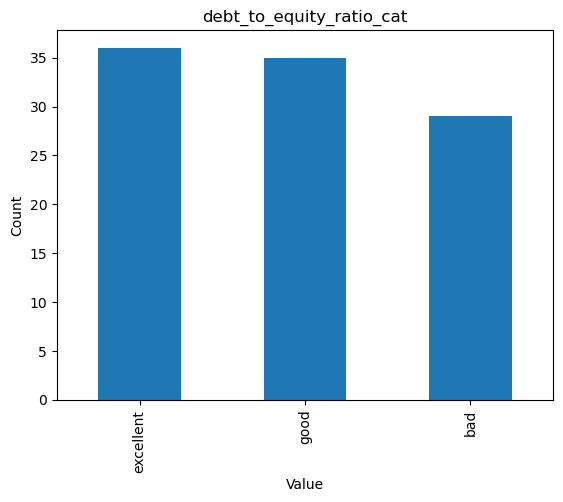

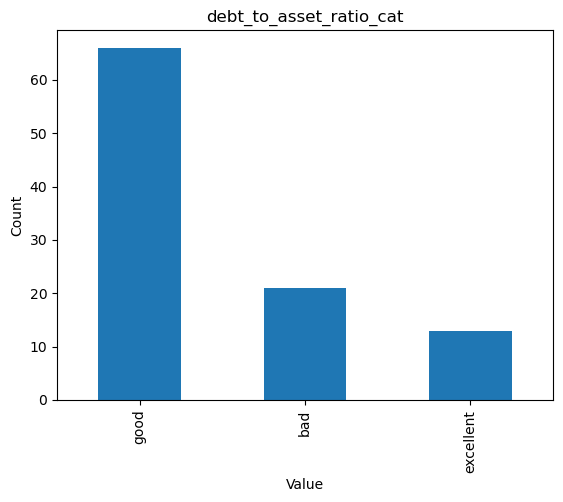

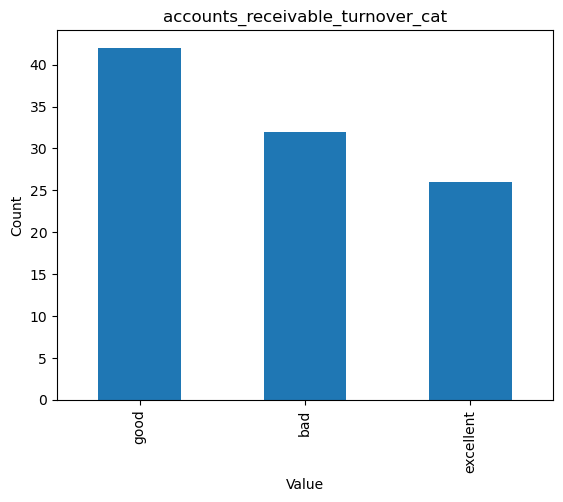

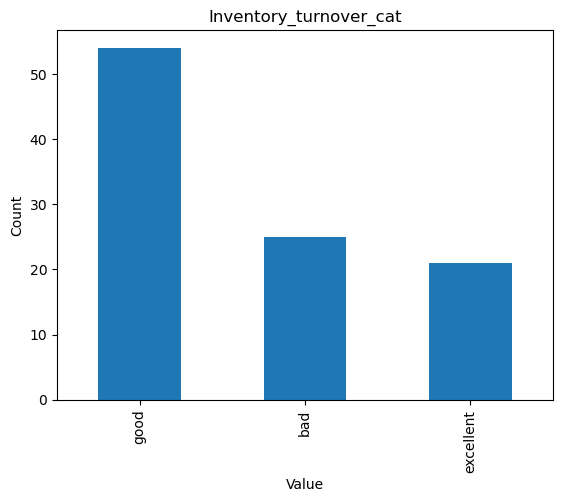

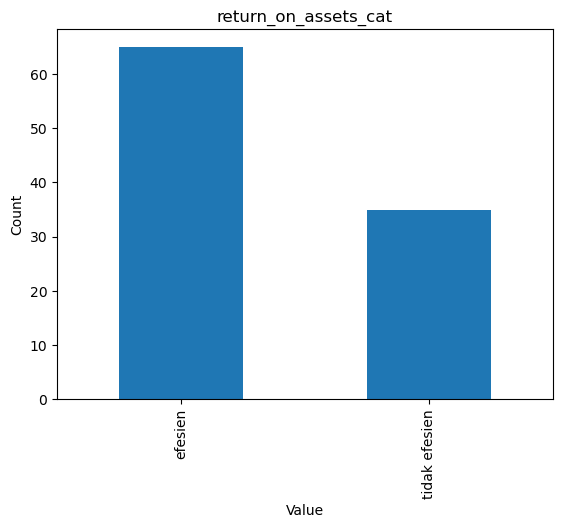

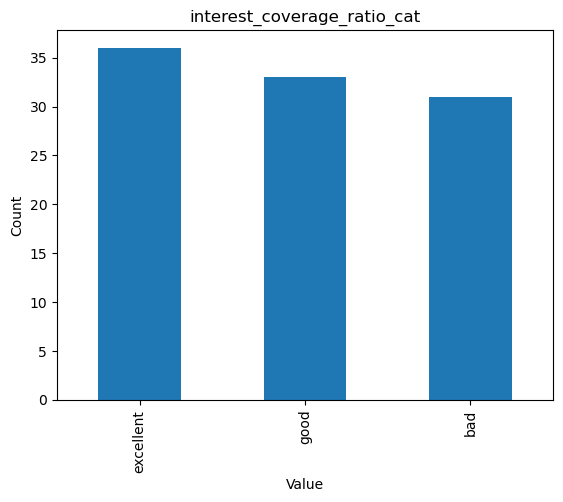

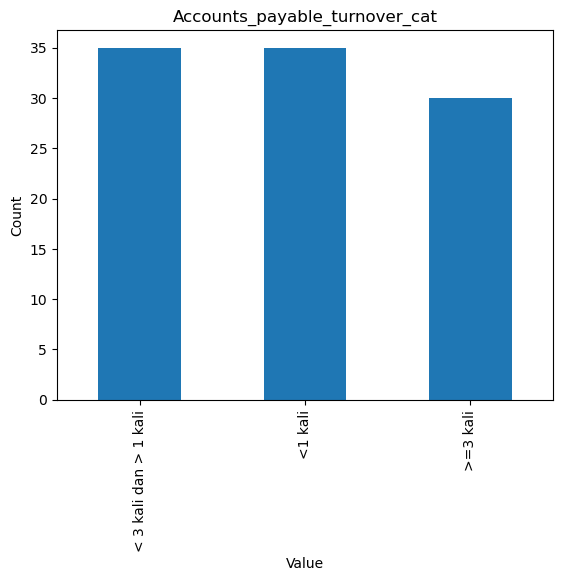

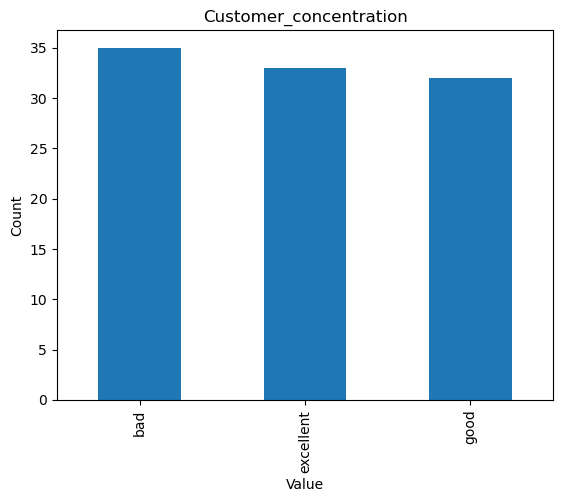

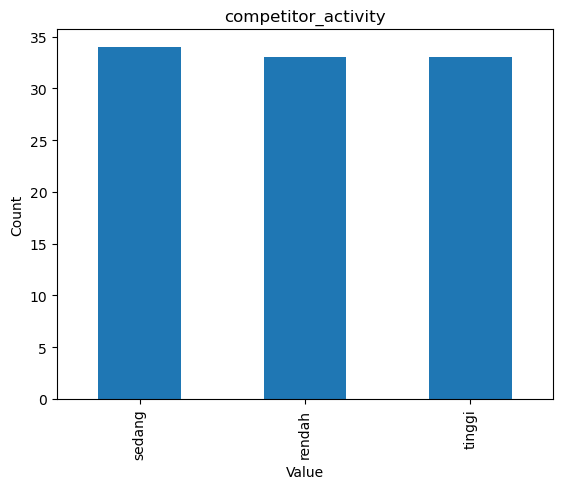

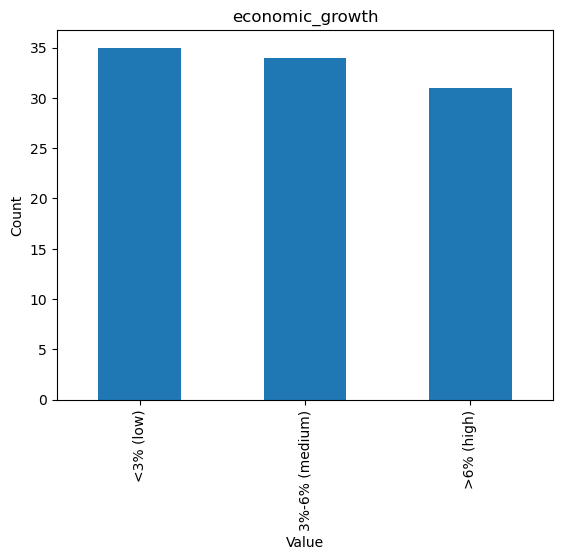

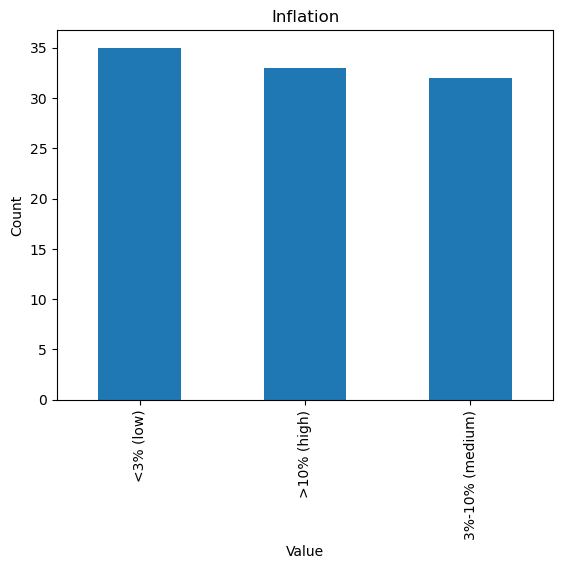

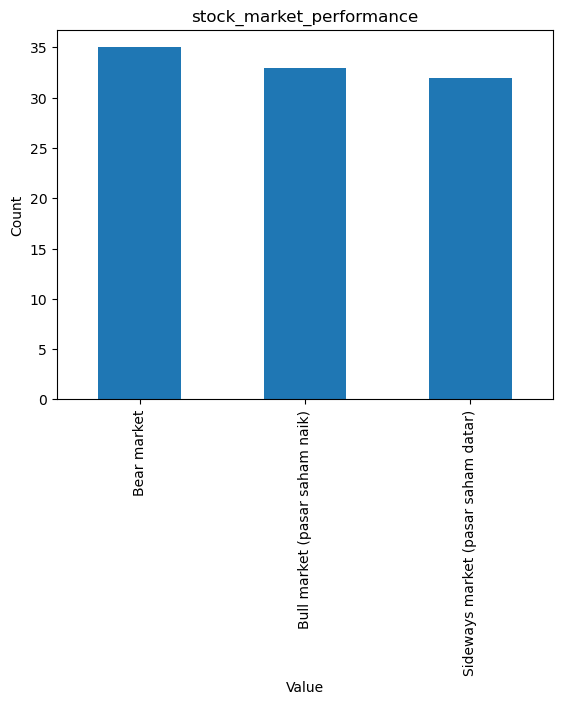

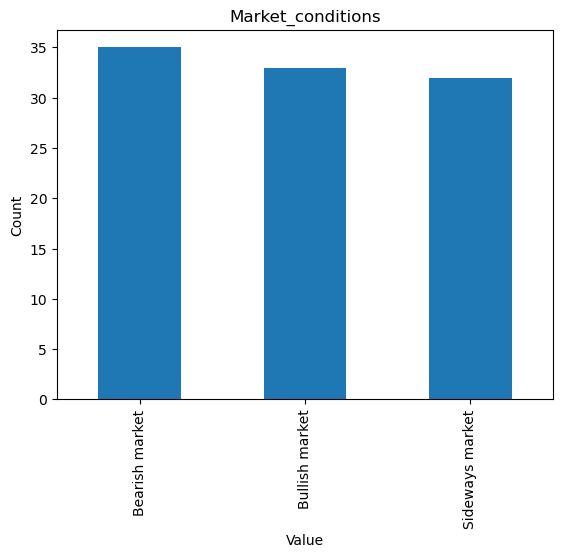

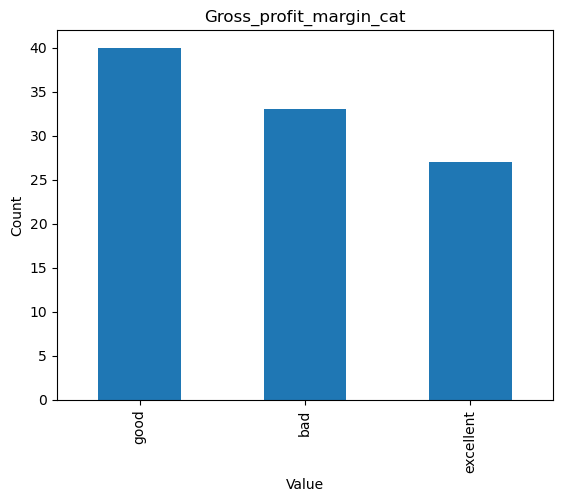

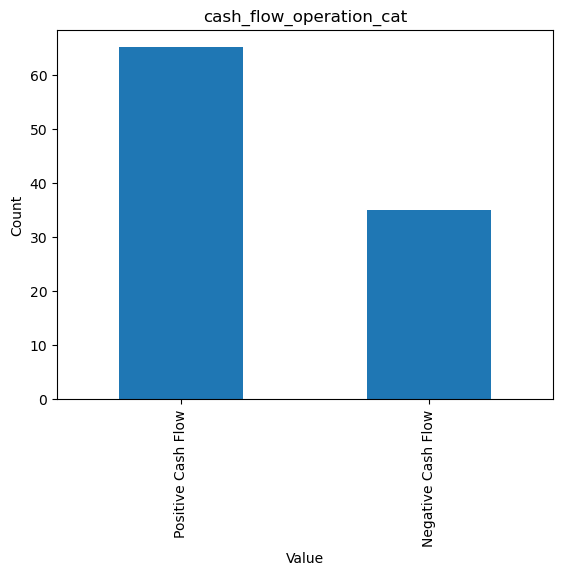

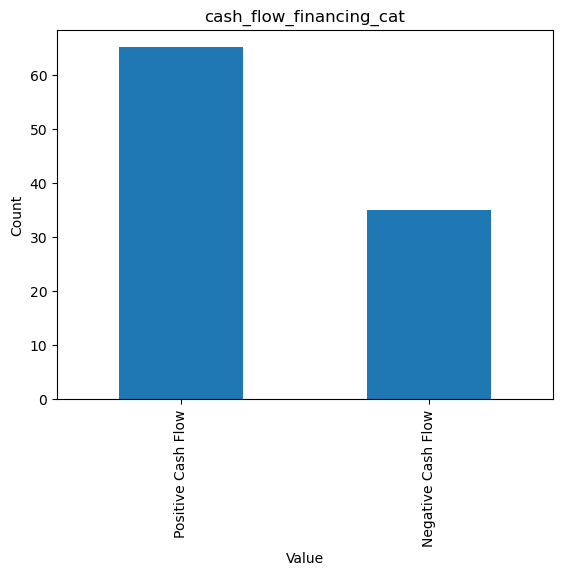

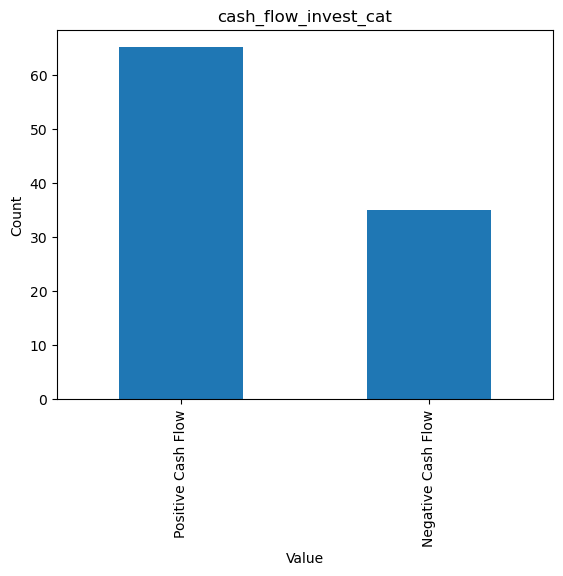

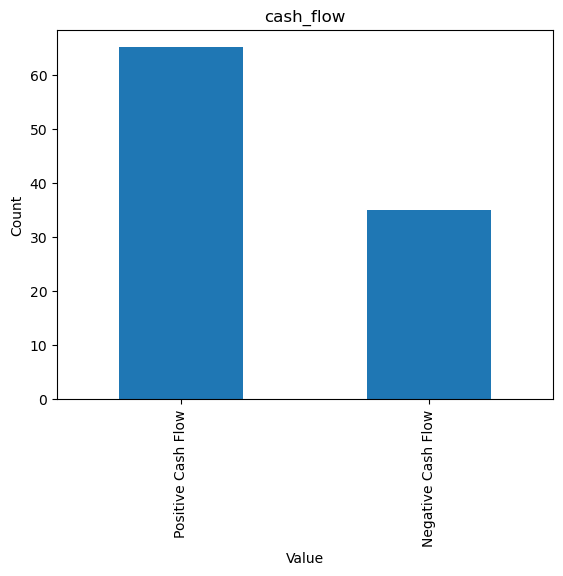

In [16]:
import pandas as pd
import matplotlib.pyplot as plt


# Plot value counts for each column
for col in df.columns:
    if df[col].dtype == 'object':  # Check if the column contains string values
        plt.figure()  # Create a new figure for each column
        df[col].value_counts().plot(kind='bar')
        plt.title(col)
        plt.xlabel('Value')
        plt.ylabel('Count')

plt.show()  # Show the plot

#### Numerical Data

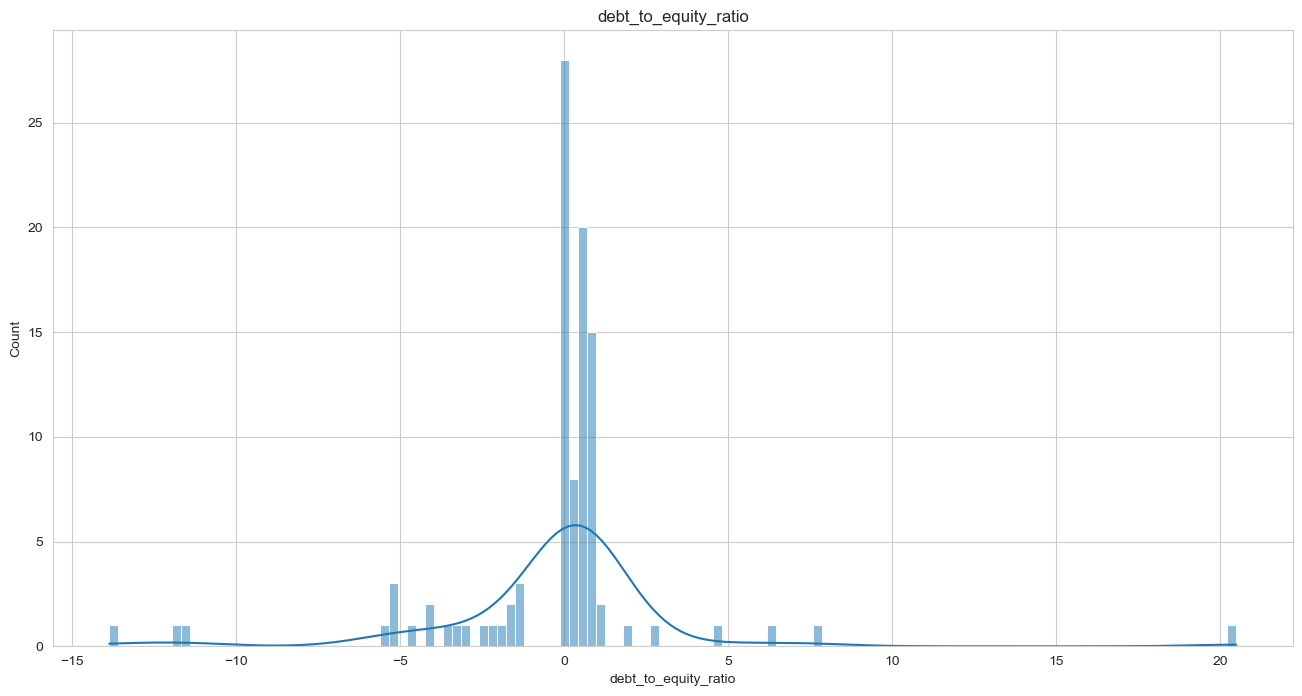

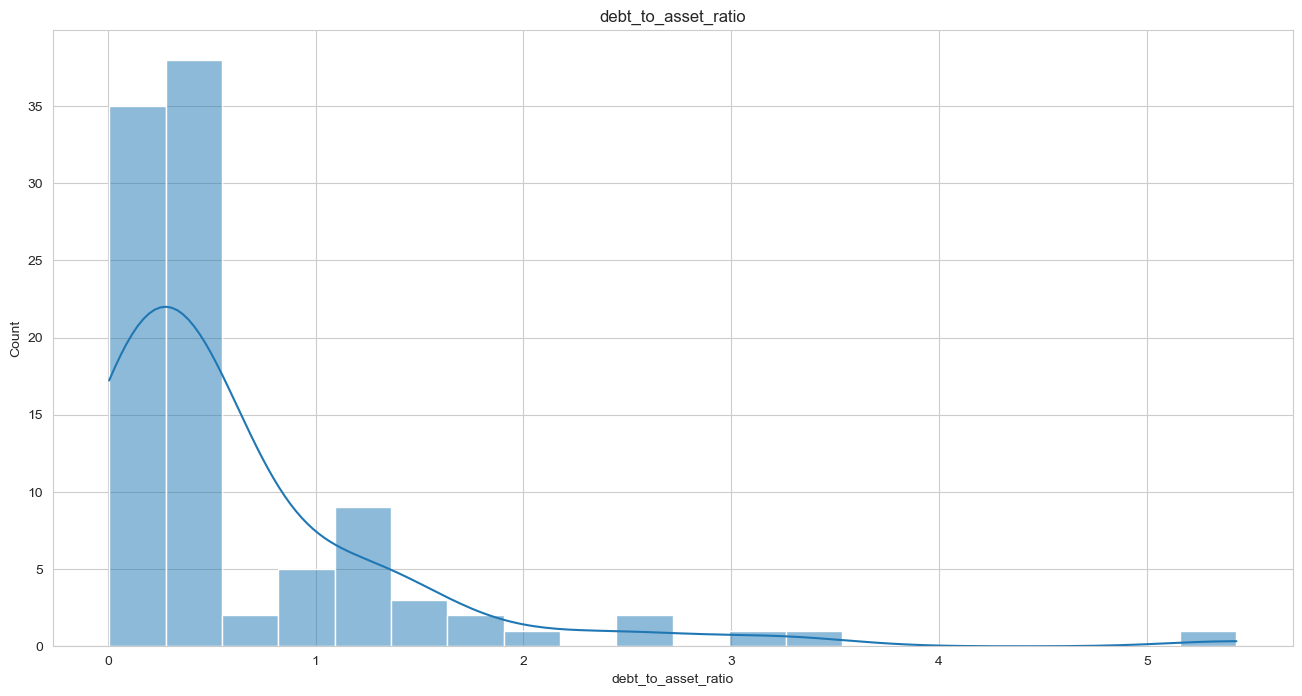

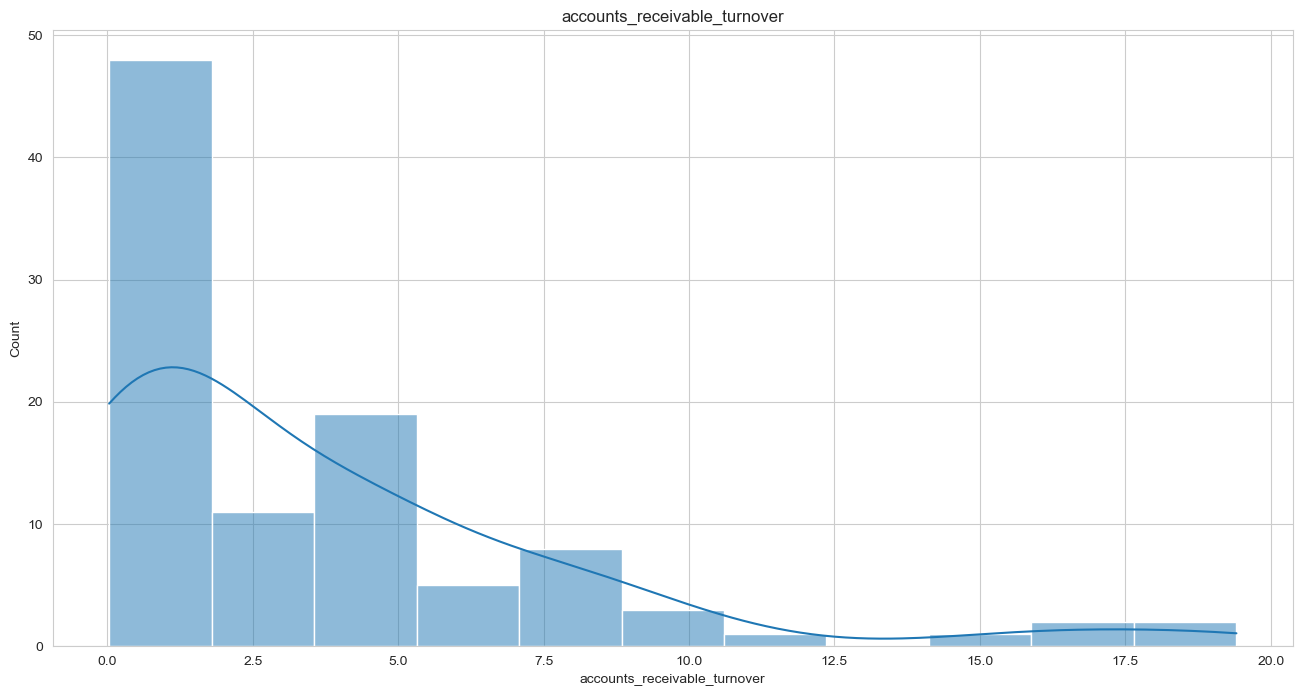

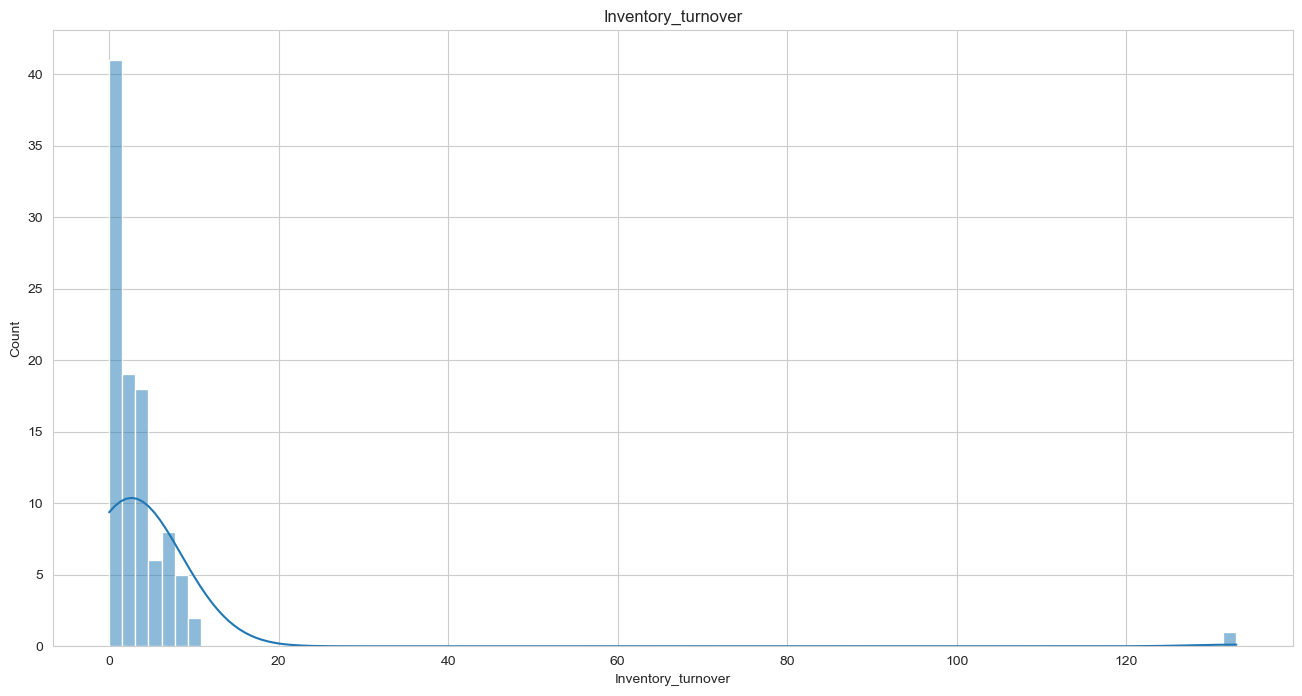

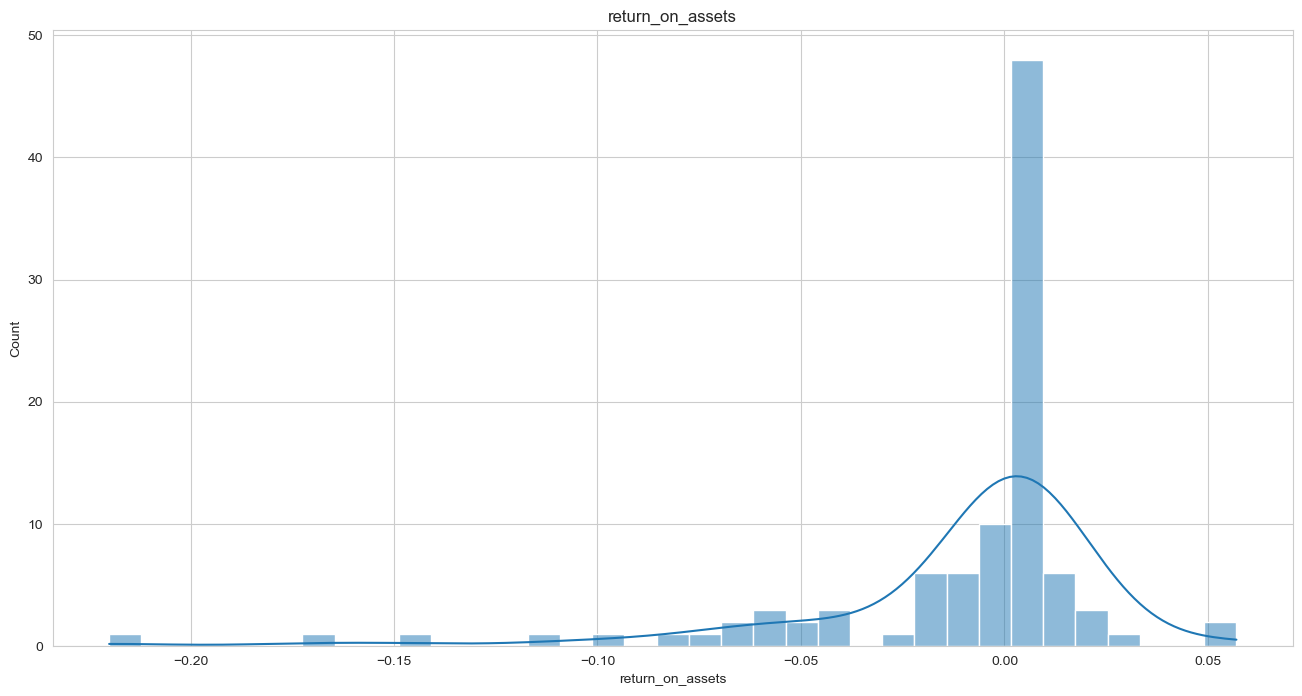

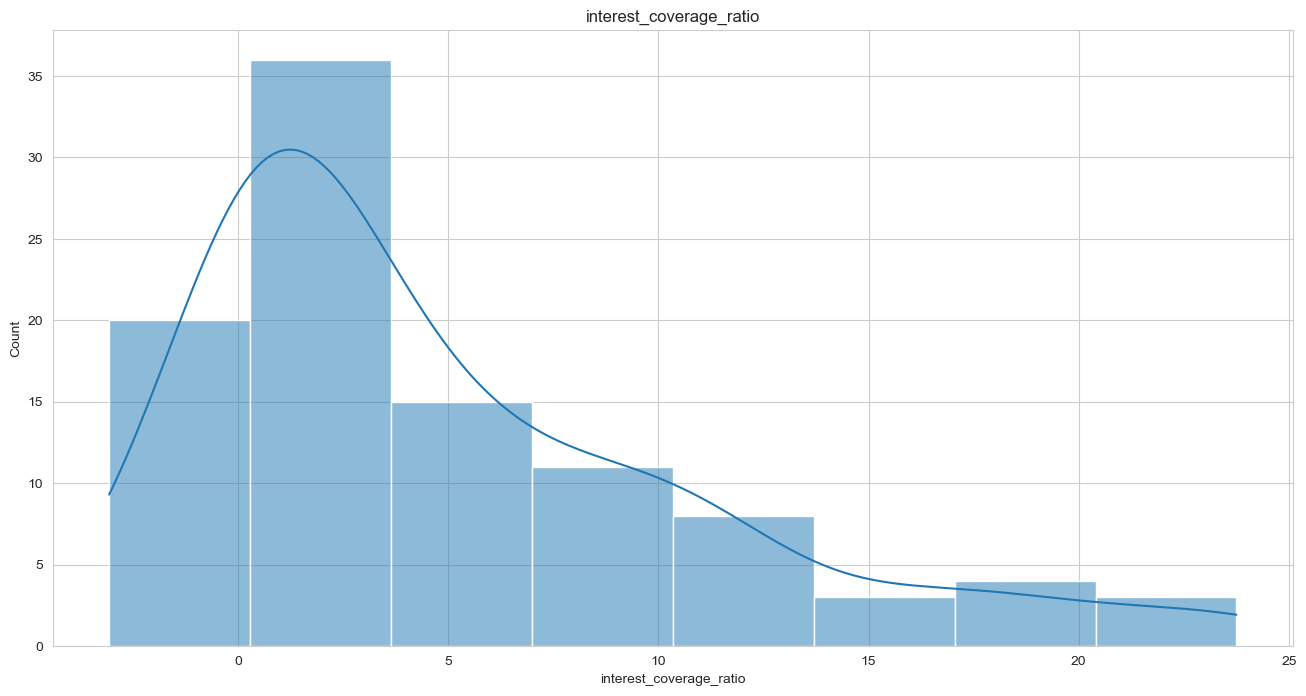

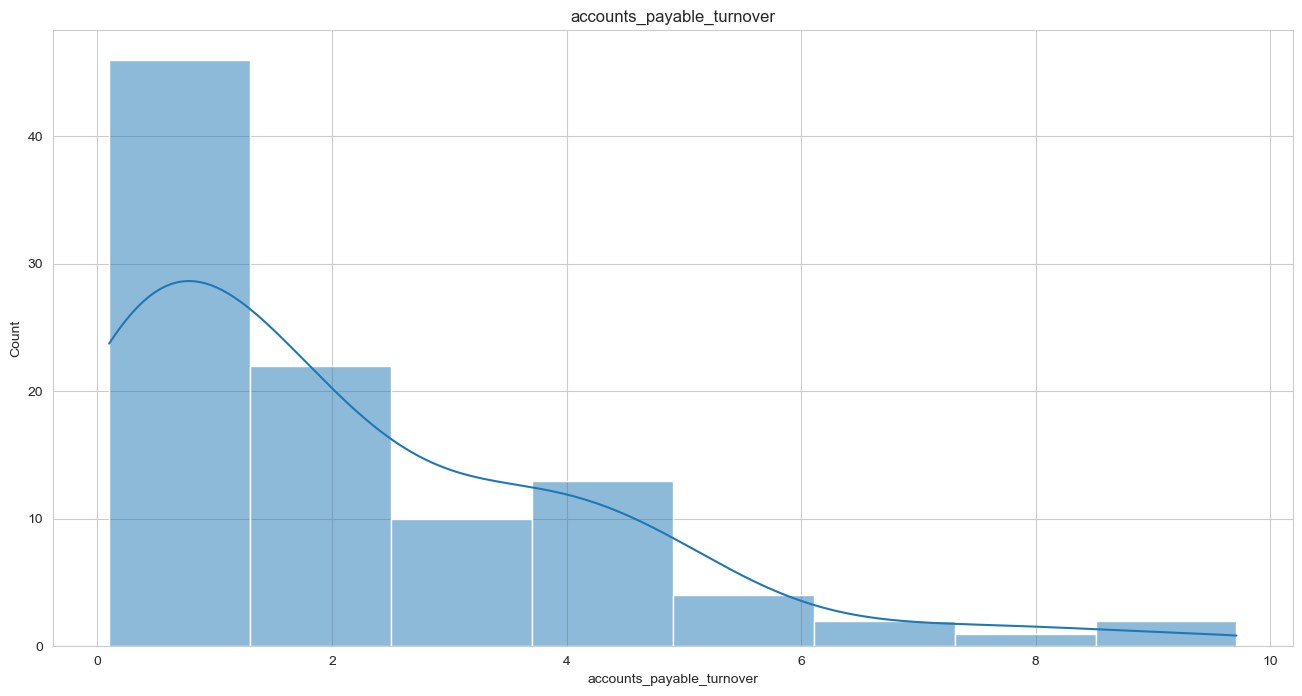

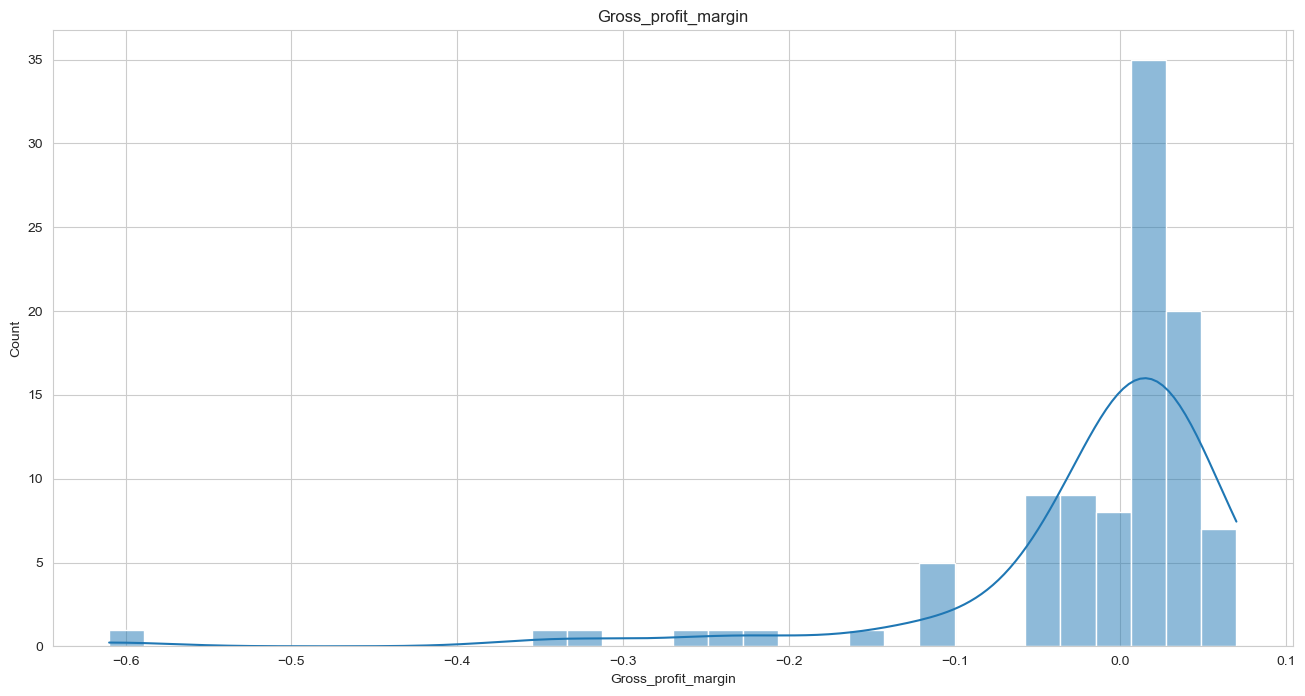

In [17]:
# histogram
for col in numerical_cols:
    plt.figure(figsize=(16, 8))
    sns.set_style('whitegrid')
    plt.title(col)
    sns.histplot(df[col], kde=True)
    plt.show()

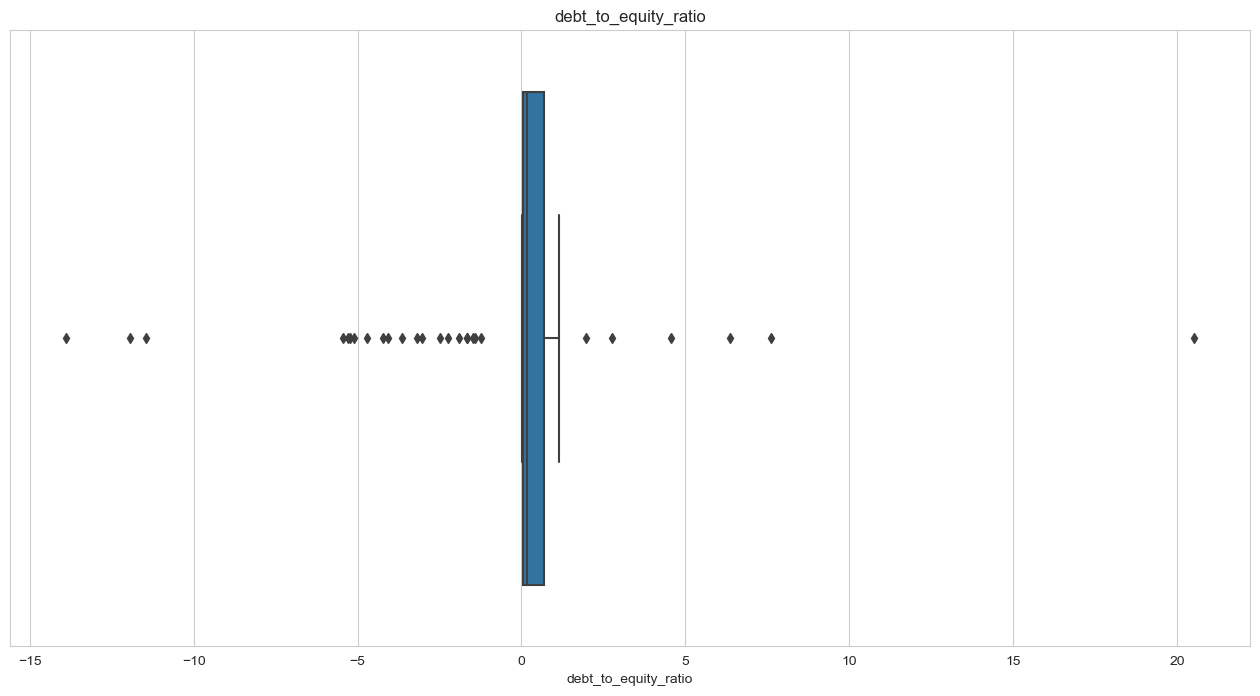

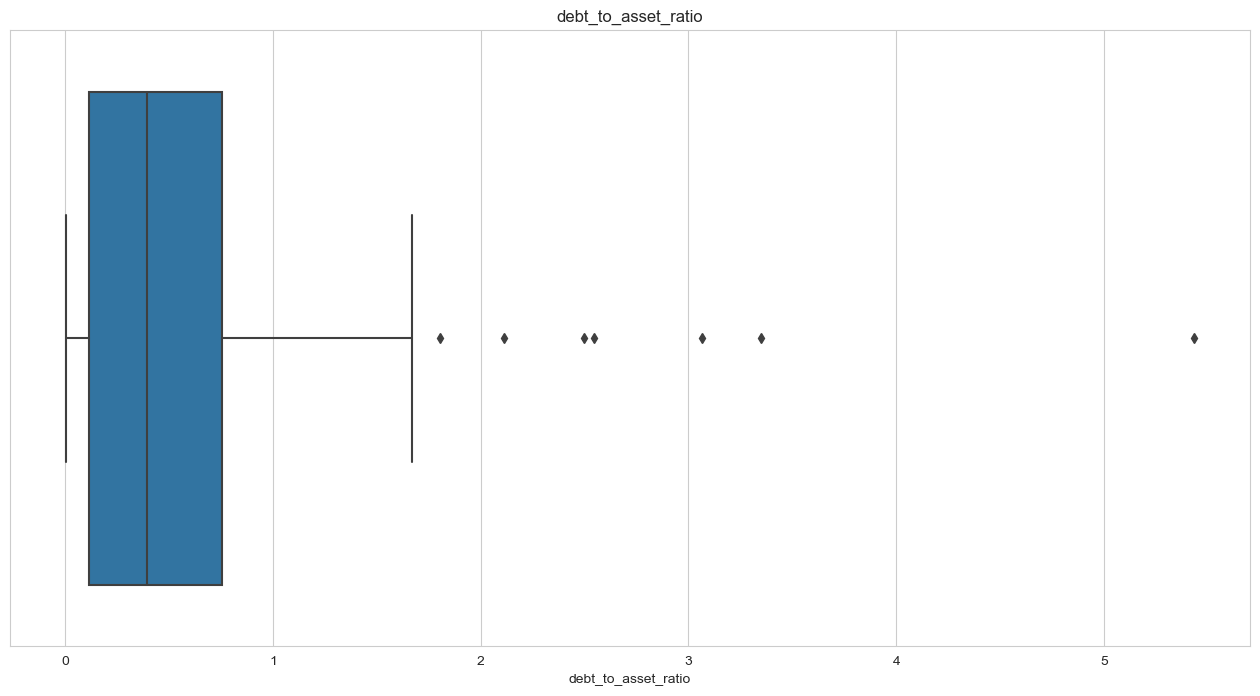

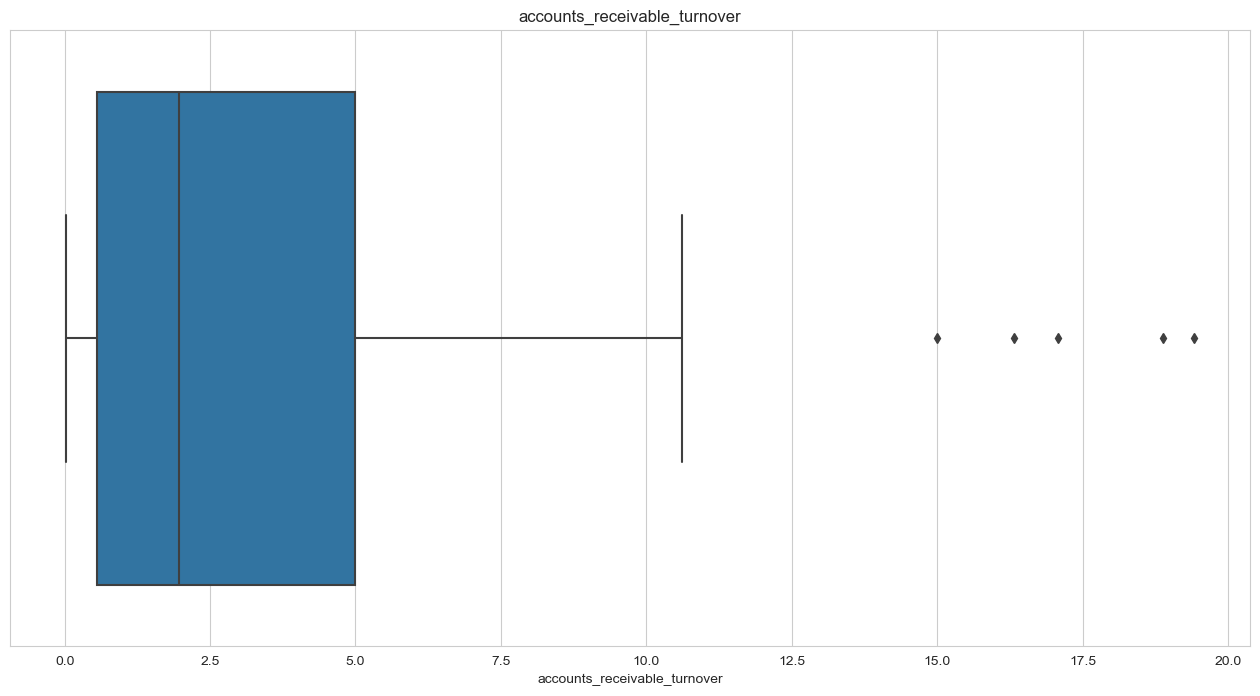

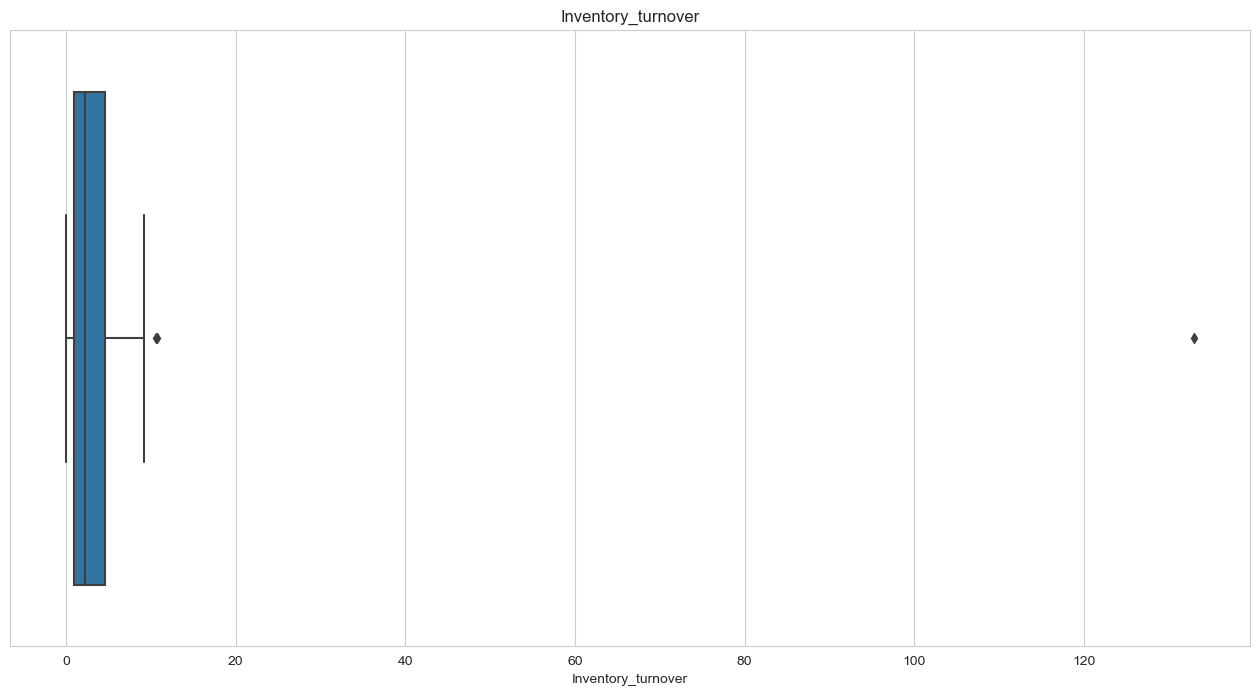

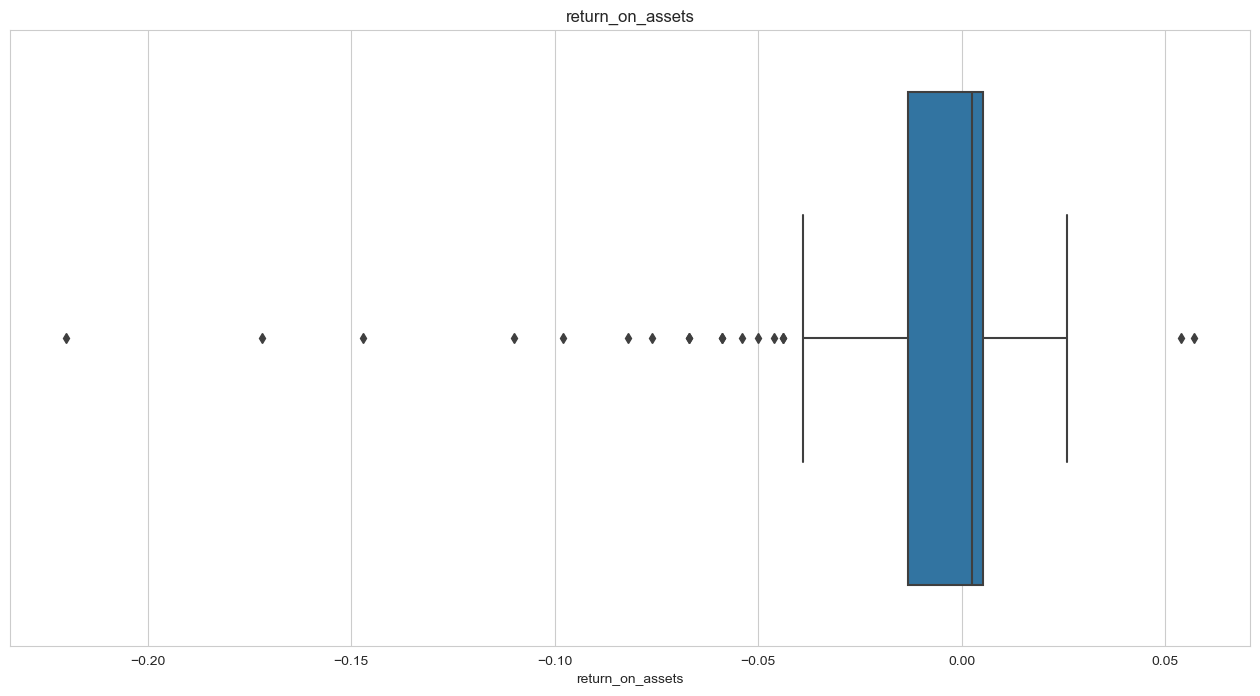

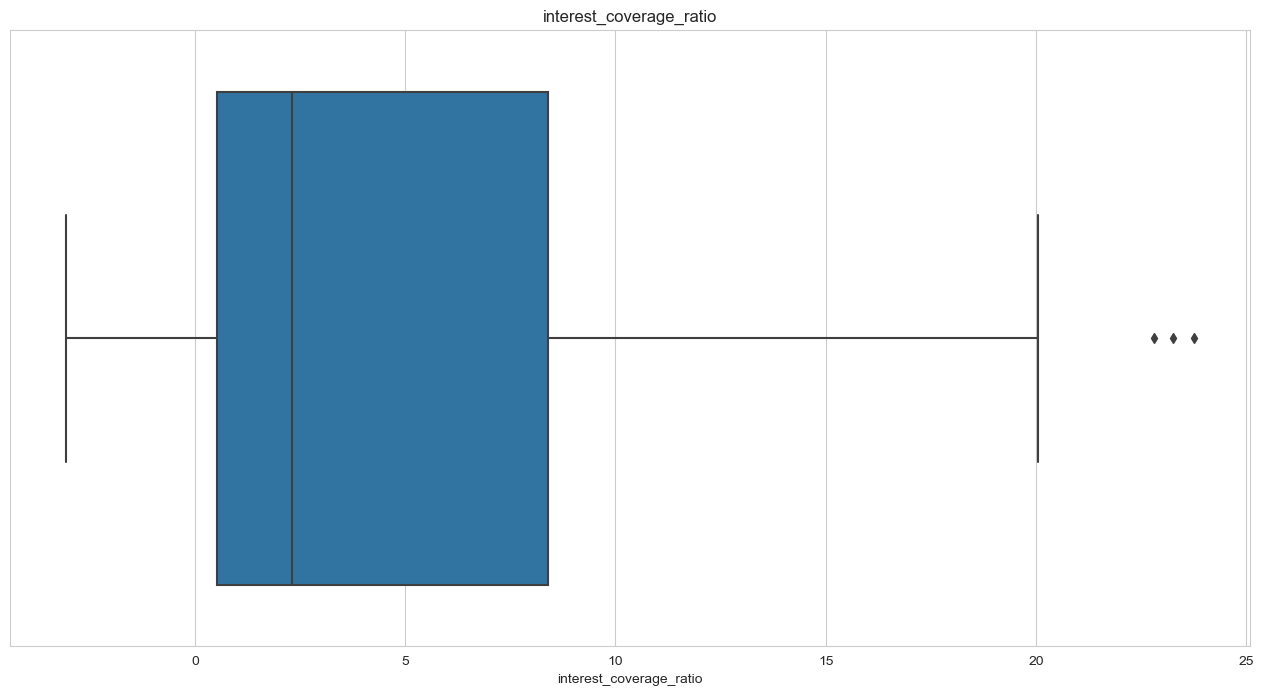

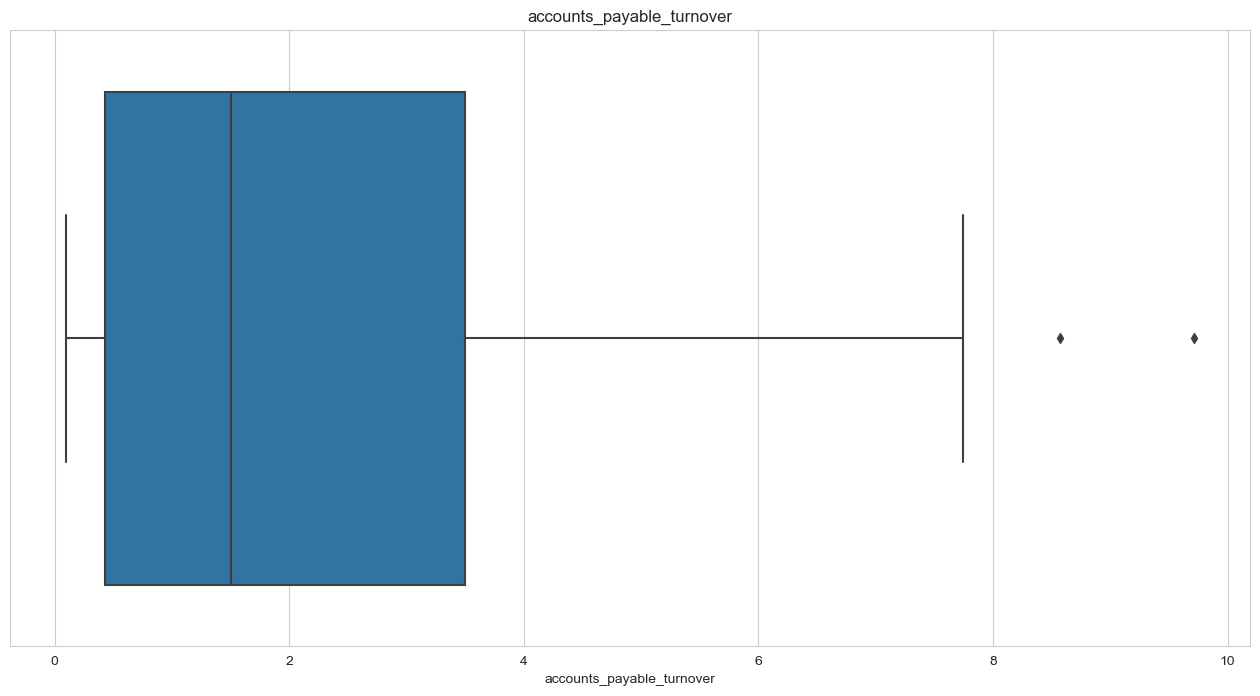

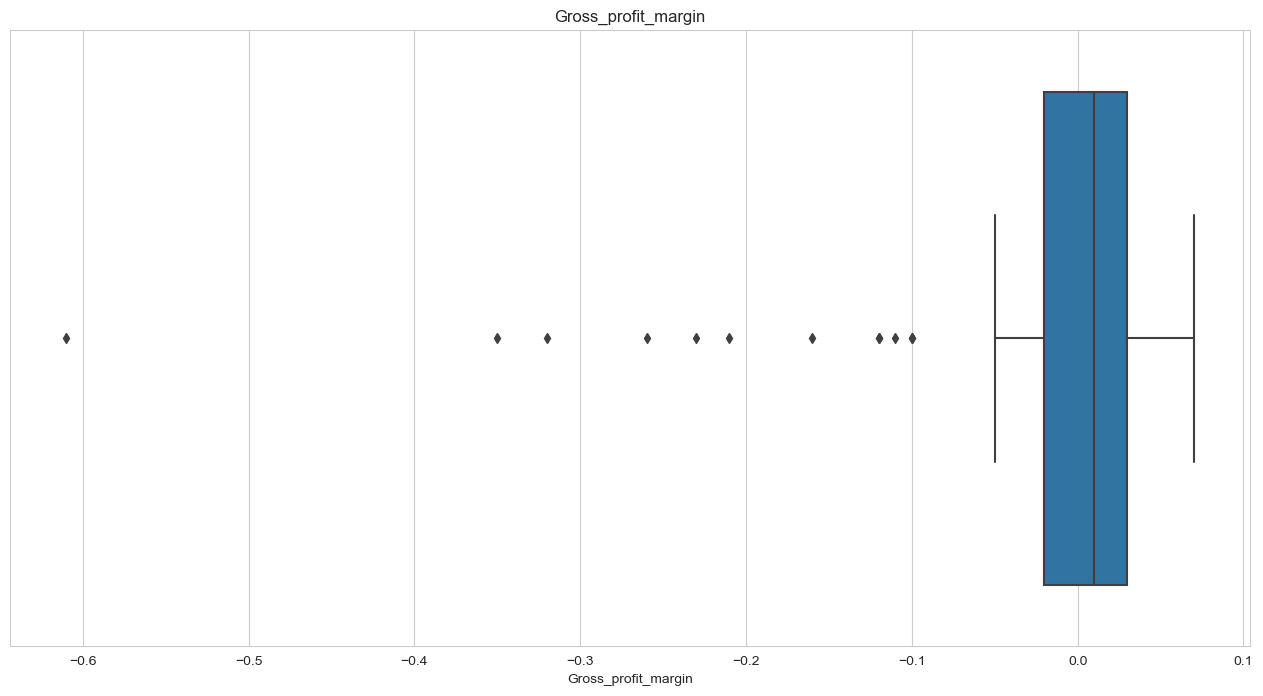

In [18]:
# boxplot for outlier detection
for col in numerical_cols:
    plt.figure(figsize=(16, 8))
    sns.set_style('whitegrid')
    plt.title(col)
    sns.boxplot(df[col])
    plt.show()

#### Exploratory Data Analysis: Multivariate Analysis

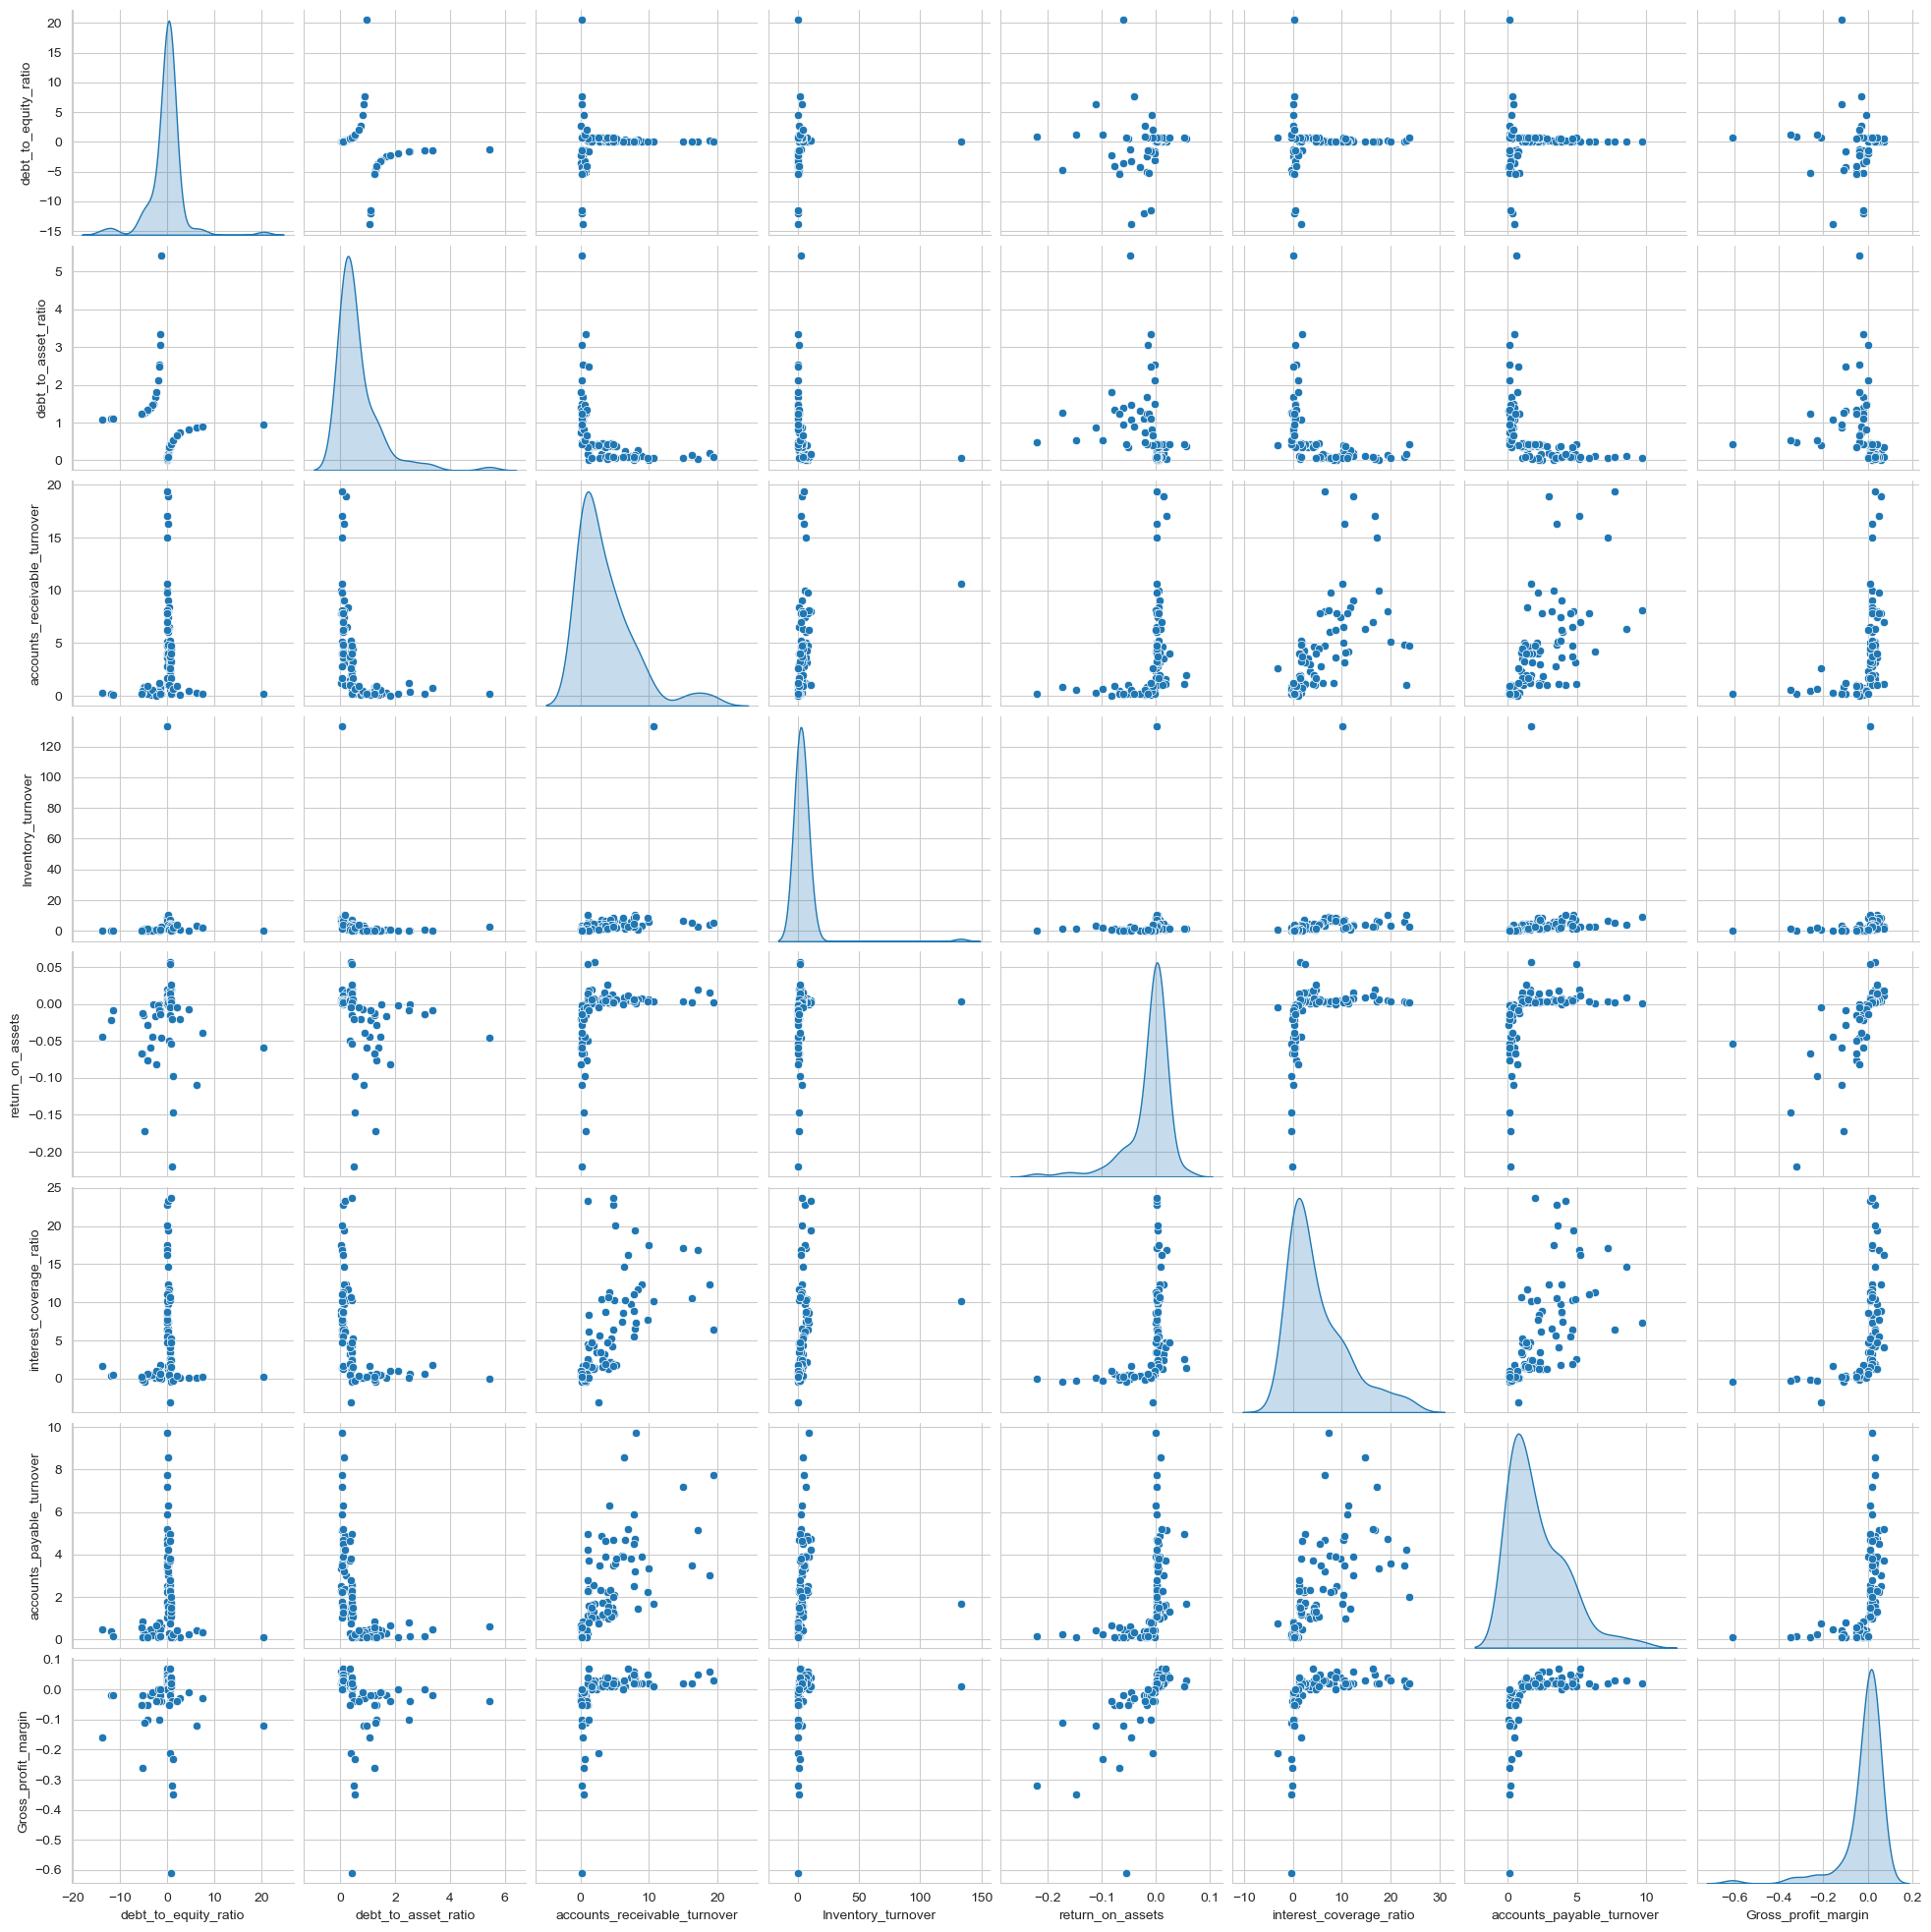

In [19]:
# pairplot
sns.pairplot(df[numerical_cols], diag_kind='kde')
plt.gcf().set_size_inches(20, 20)
plt.show()

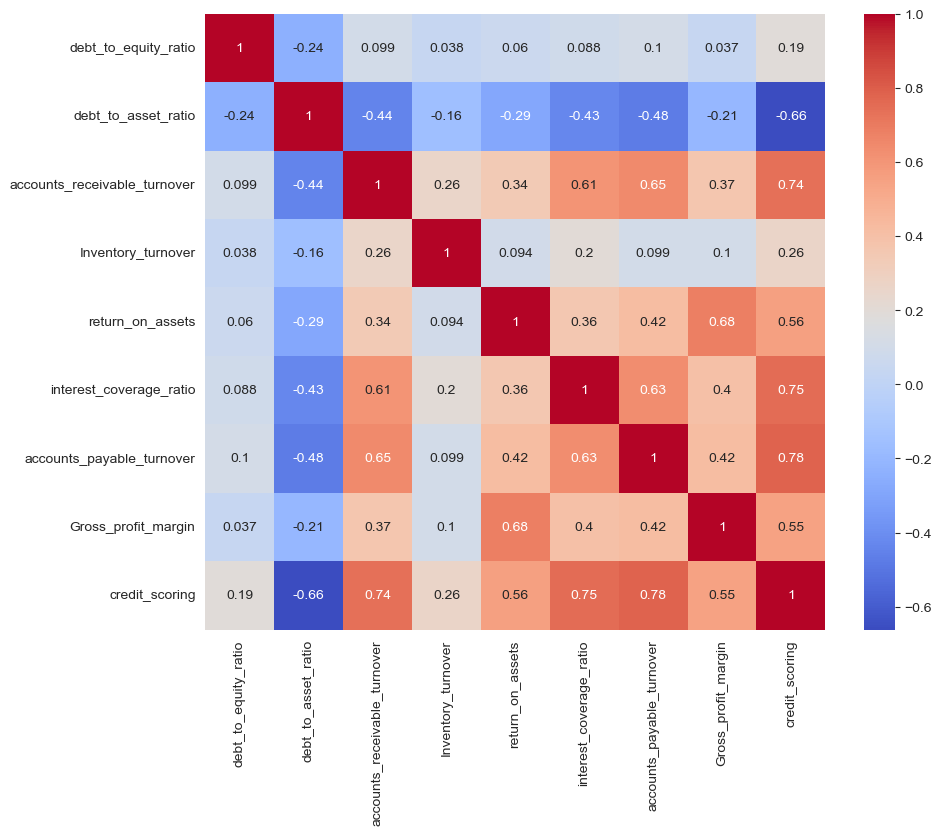

In [20]:
# melihat korelasi antar kolom
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

#### Encoding Fitur Kategorikal

In [21]:
df_encoded = df.copy()

In [22]:
from sklearn.preprocessing import LabelEncoder

# label encoding
le = LabelEncoder()
for col in categorical_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])
    
df_encoded.head()

,debt_to_equity_ratio,debt_to_equity_ratio_cat,debt_to_asset_ratio,debt_to_asset_ratio_cat,accounts_receivable_turnover,accounts_receivable_turnover_cat,Inventory_turnover,Inventory_turnover_cat,return_on_assets,return_on_assets_cat,...,Inflation,stock_market_performance,Market_conditions,Gross_profit_margin,Gross_profit_margin_cat,cash_flow_operation_cat,cash_flow_financing_cat,cash_flow_invest_cat,cash_flow,credit_scoring
0,0.12,1,0.110,2,7.43,1,6.22,1,0.005,0,...,2,1,1,0.04,1,1,1,1,1,98.0
1,0.10,1,0.095,2,6.04,1,6.68,1,0.003,0,...,2,1,1,0.02,2,1,1,1,1,94.0
2,0.06,1,0.060,1,15.00,1,6.43,1,0.003,0,...,2,1,1,0.02,2,1,1,1,1,96.0
3,0.33,1,0.246,2,6.55,1,1.25,2,0.003,0,...,2,1,1,0.01,2,1,1,1,1,90.0
4,0.02,1,0.018,1,10.00,1,5.95,1,0.006,0,...,2,1,1,0.02,2,1,1,1,1,96.0


In [23]:
df.head()

,debt_to_equity_ratio,debt_to_equity_ratio_cat,debt_to_asset_ratio,debt_to_asset_ratio_cat,accounts_receivable_turnover,accounts_receivable_turnover_cat,Inventory_turnover,Inventory_turnover_cat,return_on_assets,return_on_assets_cat,...,Inflation,stock_market_performance,Market_conditions,Gross_profit_margin,Gross_profit_margin_cat,cash_flow_operation_cat,cash_flow_financing_cat,cash_flow_invest_cat,cash_flow,credit_scoring
0,0.12,excellent,0.110,good,7.43,excellent,6.22,excellent,0.005,efesien,...,>10% (high),Bull market (pasar saham naik),Bullish market,0.04,excellent,Positive Cash Flow,Positive Cash Flow,Positive Cash Flow,Positive Cash Flow,98.0
1,0.10,excellent,0.095,good,6.04,excellent,6.68,excellent,0.003,efesien,...,>10% (high),Bull market (pasar saham naik),Bullish market,0.02,good,Positive Cash Flow,Positive Cash Flow,Positive Cash Flow,Positive Cash Flow,94.0
2,0.06,excellent,0.060,excellent,15.00,excellent,6.43,excellent,0.003,efesien,...,>10% (high),Bull market (pasar saham naik),Bullish market,0.02,good,Positive Cash Flow,Positive Cash Flow,Positive Cash Flow,Positive Cash Flow,96.0
3,0.33,excellent,0.246,good,6.55,excellent,1.25,good,0.003,efesien,...,>10% (high),Bull market (pasar saham naik),Bullish market,0.01,good,Positive Cash Flow,Positive Cash Flow,Positive Cash Flow,Positive Cash Flow,90.0
4,0.02,excellent,0.018,excellent,10.00,excellent,5.95,excellent,0.006,efesien,...,>10% (high),Bull market (pasar saham naik),Bullish market,0.02,good,Positive Cash Flow,Positive Cash Flow,Positive Cash Flow,Positive Cash Flow,96.0


### Correlation Analysis

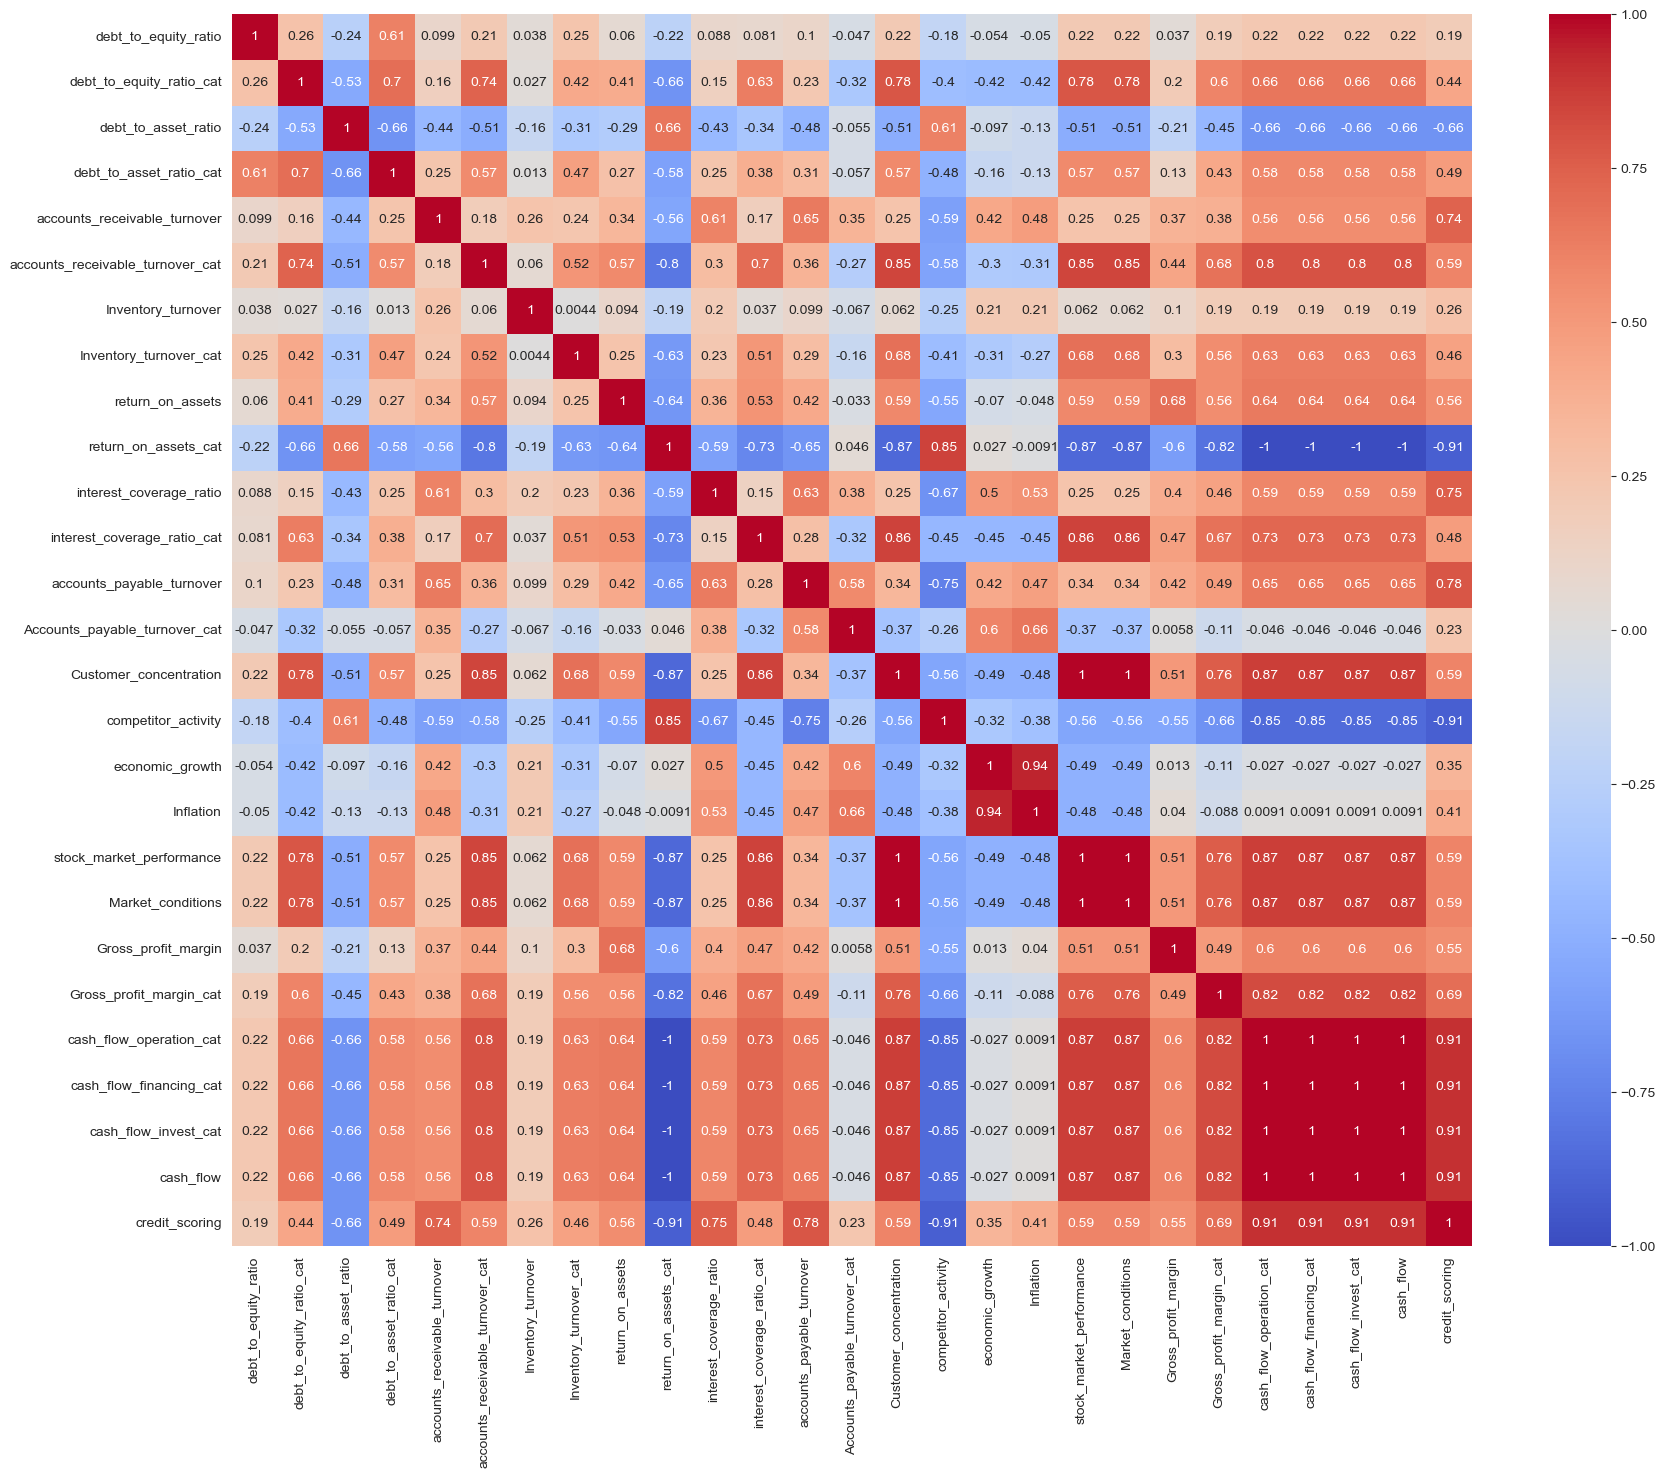

In [24]:
# korelasi antar kolom setelah label encoding
plt.figure(figsize=(20, 16))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm')
plt.show()

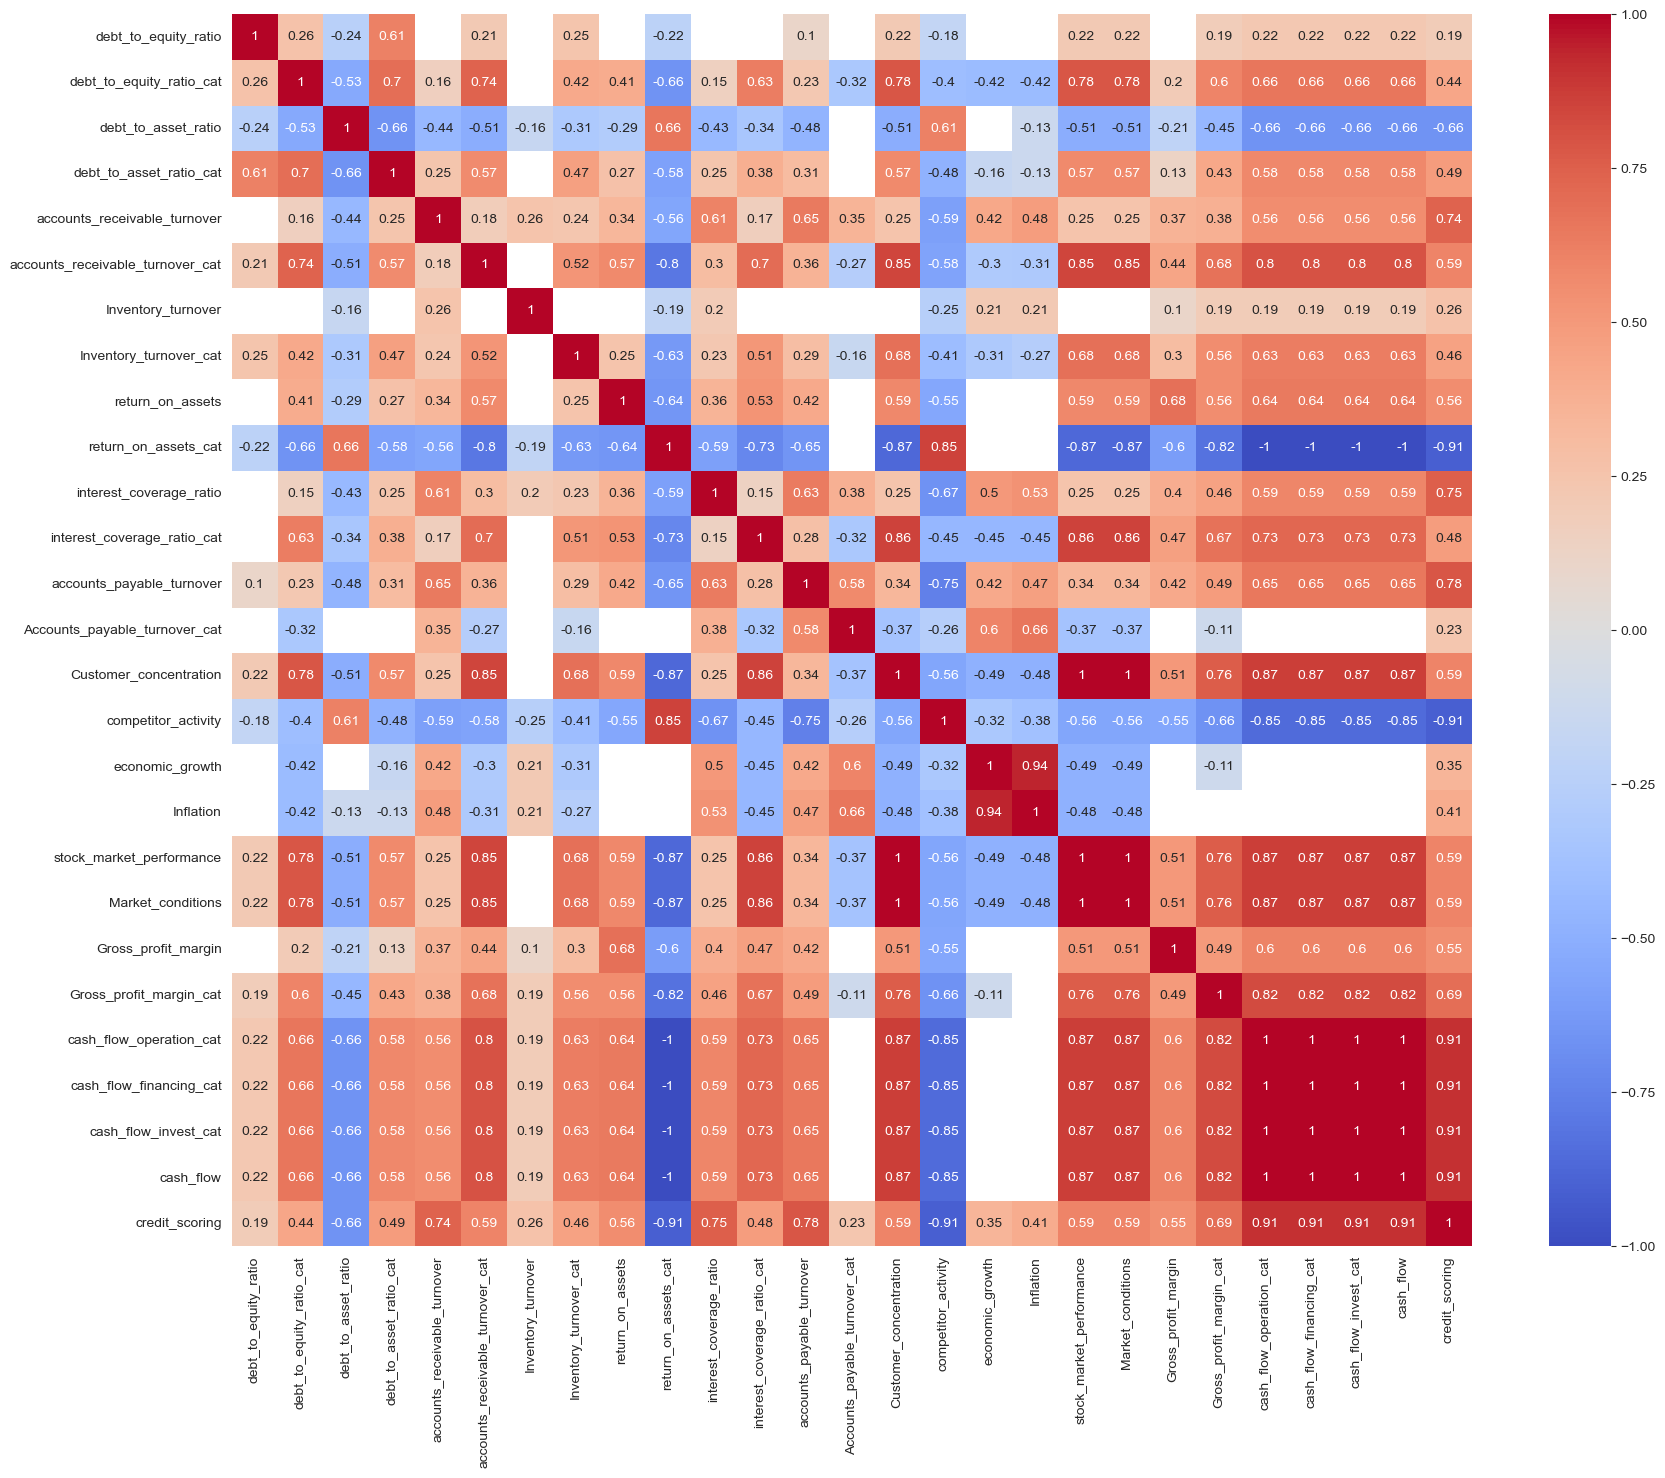

In [25]:
# get variable with high correlation
high_corr = df_encoded.corr()[abs(df_encoded.corr()) > 0.1]
plt.figure(figsize=(20, 16))
sns.heatmap(high_corr, annot=True, cmap='coolwarm')
plt.show()

In [26]:
correlation = df.corr(method='pearson')
correlation

,debt_to_equity_ratio,debt_to_asset_ratio,accounts_receivable_turnover,Inventory_turnover,return_on_assets,interest_coverage_ratio,accounts_payable_turnover,Gross_profit_margin,credit_scoring
debt_to_equity_ratio,1.000000,-0.244596,0.099335,0.038468,0.059646,0.088031,0.104697,0.037171,0.192372
debt_to_asset_ratio,-0.244596,1.000000,-0.441687,-0.157332,-0.287874,-0.431313,-0.475525,-0.205647,-0.662041
accounts_receivable_turnover,0.099335,-0.441687,1.000000,0.257745,0.342430,0.605761,0.646282,0.365999,0.735213
Inventory_turnover,0.038468,-0.157332,0.257745,1.000000,0.094381,0.201358,0.099184,0.102405,0.263544
return_on_assets,0.059646,-0.287874,0.342430,0.094381,1.000000,0.357847,0.417363,0.684475,0.555314
interest_coverage_ratio,0.088031,-0.431313,0.605761,0.201358,0.357847,1.000000,0.633072,0.397381,0.752552
accounts_payable_turnover,0.104697,-0.475525,0.646282,0.099184,0.417363,0.633072,1.000000,0.419162,0.781465
Gross_profit_margin,0.037171,-0.205647,0.365999,0.102405,0.684475,0.397381,0.419162,1.000000,0.550970
credit_scoring,0.192372,-0.662041,0.735213,0.263544,0.555314,0.752552,0.781465,0.550970,1.000000


In [27]:
# sort correlation by credit_score
corr_df = df.corr()
corr_abs_df = abs(corr_df)
corr_abs_df['credit_scoring'].sort_values(ascending=False)[:27]

credit_scoring                  1.000000
accounts_payable_turnover       0.781465
interest_coverage_ratio         0.752552
accounts_receivable_turnover    0.735213
debt_to_asset_ratio             0.662041
return_on_assets                0.555314
Gross_profit_margin             0.550970
Inventory_turnover              0.263544
debt_to_equity_ratio            0.192372
Name: credit_scoring, dtype: float64

### C. Data Preparation

In [28]:
# # TODO: Salah milih fitur target
# # * Harusnya kalau pake kolom credit_score pakainya regresi, karena nilainya kontinus :D
# # target menggunakan kolom credit_score
df2 = df.copy()
# df2 = df2.drop(['credit_score_category'], axis=1)

In [29]:
# * Nah kalau ini pakai klasifikasi, karena nilainya diskrit
# # target menggunakan kolom credit_score_category
# df2 = df.copy()
# df2 = df2.drop(['credit_scoring'], axis=1)

# # encode credit_score_category
# df2['credit_score_category'] = le.fit_transform(df2['credit_score_category'])

In [30]:
numerical_feature = ['debt_to_equity_ratio', 'debt_to_asset_ratio','accounts_receivable_turnover','Inventory_turnover','return_on_assets','interest_coverage_ratio','accounts_payable_turnover','Gross_profit_margin']
nominal_feature = ['Customer_concentration', 'competitor_activity', 'economic_growth', 'Inflation','stock_market_performance','Market_conditions']
ordinal_feature = ['debt_to_equity_ratio_cat', 'debt_to_asset_ratio_cat', 'accounts_receivable_turnover_cat', 'Inventory_turnover_cat', 'return_on_assets_cat', 'interest_coverage_ratio_cat', 'Accounts_payable_turnover_cat','Market_conditions','Gross_profit_margin_cat','cash_flow_operation_cat','cash_flow_financing_cat','cash_flow_invest_cat','cash_flow']

####Label Encoding (Ordinal Features)

In [31]:
debt_to_equity_ratio_cat  = ["excellent","good","bad"]
debt_to_asset_ratio_cat  = ["excellent","good","bad"]
accounts_receivable_turnover_cat  = ["excellent","good","bad"]
Inventory_turnover_cat  = ["excellent","good","bad"]
return_on_assets_cat  = ["efesien","tidak efesien"]
interest_coverage_ratio_cat  = ["excellent","good","bad"]
Accounts_payable_turnover_cat  = [">=3 kali", "< 3 kali dan > 1 kali", '<1 kali']
Market_conditions  = ['Bullish market', 'Sideways market', "Bearish market"]
Gross_profit_margin_cat  = ["excellent","good","bad"]
cash_flow_operation_cat  = ["Positive Cash Flow","Negative Cash Flow"]
cash_flow_financing_cat  = ["Positive Cash Flow","Negative Cash Flow"]
cash_flow_invest_cat  = ["Positive Cash Flow","Negative Cash Flow"]
cash_flow  = ["Positive Cash Flow","Negative Cash Flow"]

In [32]:
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder(categories=[debt_to_equity_ratio_cat, debt_to_asset_ratio_cat, accounts_receivable_turnover_cat, Inventory_turnover_cat, return_on_assets_cat, interest_coverage_ratio_cat, Accounts_payable_turnover_cat,Market_conditions,Gross_profit_margin_cat,cash_flow_operation_cat,cash_flow_financing_cat,cash_flow_invest_cat,cash_flow])

df_encoded = df.copy()
df_encoded[ordinal_feature] = oe.fit_transform(df_encoded[ordinal_feature])
df_encoded.head()

,debt_to_equity_ratio,debt_to_equity_ratio_cat,debt_to_asset_ratio,debt_to_asset_ratio_cat,accounts_receivable_turnover,accounts_receivable_turnover_cat,Inventory_turnover,Inventory_turnover_cat,return_on_assets,return_on_assets_cat,...,Inflation,stock_market_performance,Market_conditions,Gross_profit_margin,Gross_profit_margin_cat,cash_flow_operation_cat,cash_flow_financing_cat,cash_flow_invest_cat,cash_flow,credit_scoring
0,0.12,0.0,0.110,1.0,7.43,0.0,6.22,0.0,0.005,0.0,...,>10% (high),Bull market (pasar saham naik),0.0,0.04,0.0,0.0,0.0,0.0,0.0,98.0
1,0.10,0.0,0.095,1.0,6.04,0.0,6.68,0.0,0.003,0.0,...,>10% (high),Bull market (pasar saham naik),0.0,0.02,1.0,0.0,0.0,0.0,0.0,94.0
2,0.06,0.0,0.060,0.0,15.00,0.0,6.43,0.0,0.003,0.0,...,>10% (high),Bull market (pasar saham naik),0.0,0.02,1.0,0.0,0.0,0.0,0.0,96.0
3,0.33,0.0,0.246,1.0,6.55,0.0,1.25,1.0,0.003,0.0,...,>10% (high),Bull market (pasar saham naik),0.0,0.01,1.0,0.0,0.0,0.0,0.0,90.0
4,0.02,0.0,0.018,0.0,10.00,0.0,5.95,0.0,0.006,0.0,...,>10% (high),Bull market (pasar saham naik),0.0,0.02,1.0,0.0,0.0,0.0,0.0,96.0


####One Hot Encoding (Nominal Features)

In [33]:
df_one_encoded = pd.get_dummies(df_encoded, columns=nominal_feature, drop_first=True)
df_one_encoded.head()

,debt_to_equity_ratio,debt_to_equity_ratio_cat,debt_to_asset_ratio,debt_to_asset_ratio_cat,accounts_receivable_turnover,accounts_receivable_turnover_cat,Inventory_turnover,Inventory_turnover_cat,return_on_assets,return_on_assets_cat,...,competitor_activity_sedang,competitor_activity_tinggi,economic_growth_<3% (low),economic_growth_>6% (high),Inflation_<3% (low),Inflation_>10% (high),stock_market_performance_Bull market (pasar saham naik),stock_market_performance_Sideways market (pasar saham datar),Market_conditions_1.0,Market_conditions_2.0
0,0.12,0.0,0.110,1.0,7.43,0.0,6.22,0.0,0.005,0.0,...,0,0,0,1,0,1,1,0,0,0
1,0.10,0.0,0.095,1.0,6.04,0.0,6.68,0.0,0.003,0.0,...,0,0,0,1,0,1,1,0,0,0
2,0.06,0.0,0.060,0.0,15.00,0.0,6.43,0.0,0.003,0.0,...,1,0,0,1,0,1,1,0,0,0
3,0.33,0.0,0.246,1.0,6.55,0.0,1.25,1.0,0.003,0.0,...,0,0,0,1,0,1,1,0,0,0
4,0.02,0.0,0.018,0.0,10.00,0.0,5.95,0.0,0.006,0.0,...,0,0,0,1,0,1,1,0,0,0


#### Feature Engineering: Transformation (Numerical Features)`

In [34]:
# transformasi data menggunakan metode logaritma
df_one_encoded[numerical_feature] = np.log(df_one_encoded[numerical_feature] + 1)
df_one_encoded.head()

,debt_to_equity_ratio,debt_to_equity_ratio_cat,debt_to_asset_ratio,debt_to_asset_ratio_cat,accounts_receivable_turnover,accounts_receivable_turnover_cat,Inventory_turnover,Inventory_turnover_cat,return_on_assets,return_on_assets_cat,...,competitor_activity_sedang,competitor_activity_tinggi,economic_growth_<3% (low),economic_growth_>6% (high),Inflation_<3% (low),Inflation_>10% (high),stock_market_performance_Bull market (pasar saham naik),stock_market_performance_Sideways market (pasar saham datar),Market_conditions_1.0,Market_conditions_2.0
0,0.113329,0.0,0.104360,1.0,2.131797,0.0,1.976855,0.0,0.004988,0.0,...,0,0,0,1,0,1,1,0,0,0
1,0.095310,0.0,0.090754,1.0,1.951608,0.0,2.038620,0.0,0.002996,0.0,...,0,0,0,1,0,1,1,0,0,0
2,0.058269,0.0,0.058269,0.0,2.772589,0.0,2.005526,0.0,0.002996,0.0,...,1,0,0,1,0,1,1,0,0,0
3,0.285179,0.0,0.219938,1.0,2.021548,0.0,0.810930,1.0,0.002996,0.0,...,0,0,0,1,0,1,1,0,0,0
4,0.019803,0.0,0.017840,0.0,2.397895,0.0,1.938742,0.0,0.005982,0.0,...,0,0,0,1,0,1,1,0,0,0


#### Standardization

In [35]:
# from sklearn.preprocessing import StandardScaler

# sc = StandardScaler()
# df_one_encoded[numerical_cols] = sc.fit_transform(df_one_encoded[numerical_cols])
# df_one_encoded.head()

In [36]:
# buat pake yang udah seleksi fitur
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Membuat objek MinMaxScaler
scaler = MinMaxScaler()
# scaler = StandardScaler()
df_encoded[numerical_feature] = scaler.fit_transform(df_encoded[numerical_feature])
df_encoded.head()

,debt_to_equity_ratio,debt_to_equity_ratio_cat,debt_to_asset_ratio,debt_to_asset_ratio_cat,accounts_receivable_turnover,accounts_receivable_turnover_cat,Inventory_turnover,Inventory_turnover_cat,return_on_assets,return_on_assets_cat,...,Inflation,stock_market_performance,Market_conditions,Gross_profit_margin,Gross_profit_margin_cat,cash_flow_operation_cat,cash_flow_financing_cat,cash_flow_invest_cat,cash_flow,credit_scoring
0,0.407213,0.0,0.019171,1.0,0.381837,0.0,0.046634,0.0,0.812274,0.0,...,>10% (high),Bull market (pasar saham naik),0.0,0.955882,0.0,0.0,0.0,0.0,0.0,98.0
1,0.406632,0.0,0.016406,1.0,0.310114,0.0,0.050094,0.0,0.805054,0.0,...,>10% (high),Bull market (pasar saham naik),0.0,0.926471,1.0,0.0,0.0,0.0,0.0,94.0
2,0.405468,0.0,0.009954,0.0,0.772446,0.0,0.048214,0.0,0.805054,0.0,...,>10% (high),Bull market (pasar saham naik),0.0,0.926471,1.0,0.0,0.0,0.0,0.0,96.0
3,0.413322,0.0,0.044240,1.0,0.336429,0.0,0.009252,1.0,0.805054,0.0,...,>10% (high),Bull market (pasar saham naik),0.0,0.911765,1.0,0.0,0.0,0.0,0.0,90.0
4,0.404305,0.0,0.002212,0.0,0.514448,0.0,0.044603,0.0,0.815884,0.0,...,>10% (high),Bull market (pasar saham naik),0.0,0.926471,1.0,0.0,0.0,0.0,0.0,96.0


#### Pipeline
- Categorical Pipeline
  - Ordinal Encoding
  - One Hot Encoding
- Numerical Pipeline
  - Log Transformation
  - Standardization
- Column Transformer

In [37]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [38]:
log_transform = FunctionTransformer(np.log1p)

numerical_transformer = Pipeline(steps=[
    ('log_transform', log_transform),
    # ('scaler', StandardScaler()),
    ('scaler', MinMaxScaler()),
])

ordinal_transformer = Pipeline(steps=[
    ('ordinal', OrdinalEncoder(categories=[
          debt_to_equity_ratio_cat,
          debt_to_asset_ratio_cat,
          accounts_receivable_turnover_cat,
          Inventory_turnover_cat,
          return_on_assets_cat,
          interest_coverage_ratio_cat,
          Accounts_payable_turnover_cat,
          Market_conditions,
          Gross_profit_margin_cat,
          cash_flow_operation_cat,
          cash_flow_financing_cat,
          cash_flow_invest_cat,cash_flow
        ])),
])

# nominal_transformer = Pipeline(steps=[
#     ('onehot', OneHotEncoder(drop='first'))
# ])

# combine numerical and categorical transformer to column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_feature),
        ('ord', ordinal_transformer, ordinal_feature),
        # ('nom', nominal_transformer, nominal_feature),
    ])

In [39]:
# log_transform = FunctionTransformer(np.log1p)

# numerical_transformer = Pipeline(steps=[
#     ('log_transform', log_transform),
#     ('scaler', StandardScaler())
# ])

# ordinal_transformer = Pipeline(steps=[
#     ('ordinal', OrdinalEncoder(categories=[debt_to_equity_ratio_cat, debt_to_asset_ratio_cat, accounts_receivable_turnover_cat, Inventory_turnover_cat, return_on_assets_cat, interest_coverage_ratio_cat, Accounts_payable_turnover_cat, Market_conditions, Gross_profit_margin_category,cash_flow_operation_cat,cash_flow_financing_cat,cash_flow_invest_cat,cash_flow])),
# ])

# nominal_transformer = Pipeline(steps=[
#     ('onehot', OneHotEncoder(drop='first'))
# ])

# # combine numerical and categorical transformer to column transformer
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', numerical_transformer, numerical_feature),
#         ('ord', ordinal_transformer, ordinal_feature),
#         ('nom', nominal_transformer, nominal_feature),
#     ])

In [40]:
df2.head()

,debt_to_equity_ratio,debt_to_equity_ratio_cat,debt_to_asset_ratio,debt_to_asset_ratio_cat,accounts_receivable_turnover,accounts_receivable_turnover_cat,Inventory_turnover,Inventory_turnover_cat,return_on_assets,return_on_assets_cat,...,Inflation,stock_market_performance,Market_conditions,Gross_profit_margin,Gross_profit_margin_cat,cash_flow_operation_cat,cash_flow_financing_cat,cash_flow_invest_cat,cash_flow,credit_scoring
0,0.12,excellent,0.110,good,7.43,excellent,6.22,excellent,0.005,efesien,...,>10% (high),Bull market (pasar saham naik),Bullish market,0.04,excellent,Positive Cash Flow,Positive Cash Flow,Positive Cash Flow,Positive Cash Flow,98.0
1,0.10,excellent,0.095,good,6.04,excellent,6.68,excellent,0.003,efesien,...,>10% (high),Bull market (pasar saham naik),Bullish market,0.02,good,Positive Cash Flow,Positive Cash Flow,Positive Cash Flow,Positive Cash Flow,94.0
2,0.06,excellent,0.060,excellent,15.00,excellent,6.43,excellent,0.003,efesien,...,>10% (high),Bull market (pasar saham naik),Bullish market,0.02,good,Positive Cash Flow,Positive Cash Flow,Positive Cash Flow,Positive Cash Flow,96.0
3,0.33,excellent,0.246,good,6.55,excellent,1.25,good,0.003,efesien,...,>10% (high),Bull market (pasar saham naik),Bullish market,0.01,good,Positive Cash Flow,Positive Cash Flow,Positive Cash Flow,Positive Cash Flow,90.0
4,0.02,excellent,0.018,excellent,10.00,excellent,5.95,excellent,0.006,efesien,...,>10% (high),Bull market (pasar saham naik),Bullish market,0.02,good,Positive Cash Flow,Positive Cash Flow,Positive Cash Flow,Positive Cash Flow,96.0


In [41]:
# # apply preprocessor to your data and get transformed data
# def get_preprocessed_data(df):
#     preprocessed_data = preprocessor.fit_transform(df2)
#     cat_feature_names = preprocessor.named_transformers_['nom'].named_steps['onehot'].get_feature_names_out(nominal_feature)
#     feature_names = numerical_feature + ordinal_feature + list(cat_feature_names)
#     preprocessed_df = pd.DataFrame(preprocessed_data, columns=feature_names)
#     return preprocessed_df

# preprocessed_df = get_preprocessed_data(df2)

In [42]:
# ini pake data yang udah di seleksi fiturnya
# apply preprocessor to your data and get transformed data
def get_preprocessed_data(df_input):
    preprocessed_data = preprocessor.fit_transform(df_input)
    feature_names = numerical_feature + ordinal_feature
    preprocessed_df = pd.DataFrame(preprocessed_data, columns=feature_names)
    preprocessed_df['credit_scoring'] = df_input['credit_scoring']
    return preprocessed_df

preprocessed_df = get_preprocessed_data(df2)
preprocessed_df.head()

,debt_to_equity_ratio,debt_to_asset_ratio,accounts_receivable_turnover,Inventory_turnover,return_on_assets,interest_coverage_ratio,accounts_payable_turnover,Gross_profit_margin,debt_to_equity_ratio_cat,debt_to_asset_ratio_cat,...,return_on_assets_cat,interest_coverage_ratio_cat,Accounts_payable_turnover_cat,Market_conditions,Gross_profit_margin_cat,cash_flow_operation_cat,cash_flow_financing_cat,cash_flow_invest_cat,cash_flow,credit_scoring
0,0.033805,0.053030,0.703922,0.401215,0.833999,0.779315,0.647360,0.971823,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,98.0
1,0.027913,0.045696,0.643587,0.413877,0.827444,0.713380,0.660881,0.952583,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,94.0
2,0.015800,0.028185,0.918487,0.407093,0.827444,0.917517,0.882663,0.952583,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,96.0
3,0.090000,0.115331,0.667005,0.162189,0.827444,0.789944,0.720551,0.942822,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,90.0
4,0.003222,0.006392,0.793023,0.393401,0.837271,0.921738,0.602081,0.952583,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,96.0


#### Correlation Matrix Setelah Preprocessing

In [43]:
# merge preprocessed_df + df2['credit_score']
temp = preprocessed_df.copy()
temp['credit_scoring'] = df2['credit_scoring']
temp

,debt_to_equity_ratio,debt_to_asset_ratio,accounts_receivable_turnover,Inventory_turnover,return_on_assets,interest_coverage_ratio,accounts_payable_turnover,Gross_profit_margin,debt_to_equity_ratio_cat,debt_to_asset_ratio_cat,...,return_on_assets_cat,interest_coverage_ratio_cat,Accounts_payable_turnover_cat,Market_conditions,Gross_profit_margin_cat,cash_flow_operation_cat,cash_flow_financing_cat,cash_flow_invest_cat,cash_flow,credit_scoring
0,0.033805,0.053030,0.703922,0.401215,0.833999,0.779315,0.647360,0.971823,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,98.0
1,0.027913,0.045696,0.643587,0.413877,0.827444,0.713380,0.660881,0.952583,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,94.0
2,0.015800,0.028185,0.918487,0.407093,0.827444,0.917517,0.882663,0.952583,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,96.0
3,0.090000,0.115331,0.667005,0.162189,0.827444,0.789944,0.720551,0.942822,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,90.0
4,0.003222,0.006392,0.793023,0.393401,0.837271,0.921738,0.602081,0.952583,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,96.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,NaN,0.671449,0.249515,0.041687,0.791156,0.168082,0.216391,0.828570,2.0,2.0,...,1.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,30.0
96,NaN,0.552359,0.000000,0.094842,0.536050,0.333754,0.183452,0.892515,2.0,2.0,...,1.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,30.0
97,NaN,0.427877,0.039800,0.077693,0.589383,0.198100,0.153513,0.882140,2.0,2.0,...,1.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,25.5
98,NaN,0.752733,0.036901,0.139065,0.771193,0.265296,0.019532,0.932963,2.0,2.0,...,1.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,31.5


In [44]:
# sort correlation by credit_score
corr = temp.corr()
corr_abs = abs(corr)
corr_abs['credit_scoring'].sort_values(ascending=False)[:15]

credit_scoring                      1.000000
Market_conditions                   0.986811
interest_coverage_ratio_cat         0.948256
debt_to_equity_ratio_cat            0.941370
Accounts_payable_turnover_cat       0.924797
accounts_receivable_turnover_cat    0.919284
cash_flow                           0.908283
cash_flow_invest_cat                0.908283
cash_flow_financing_cat             0.908283
cash_flow_operation_cat             0.908283
return_on_assets_cat                0.908283
interest_coverage_ratio             0.902761
accounts_payable_turnover           0.891485
accounts_receivable_turnover        0.879931
Gross_profit_margin_cat             0.838324
Name: credit_scoring, dtype: float64

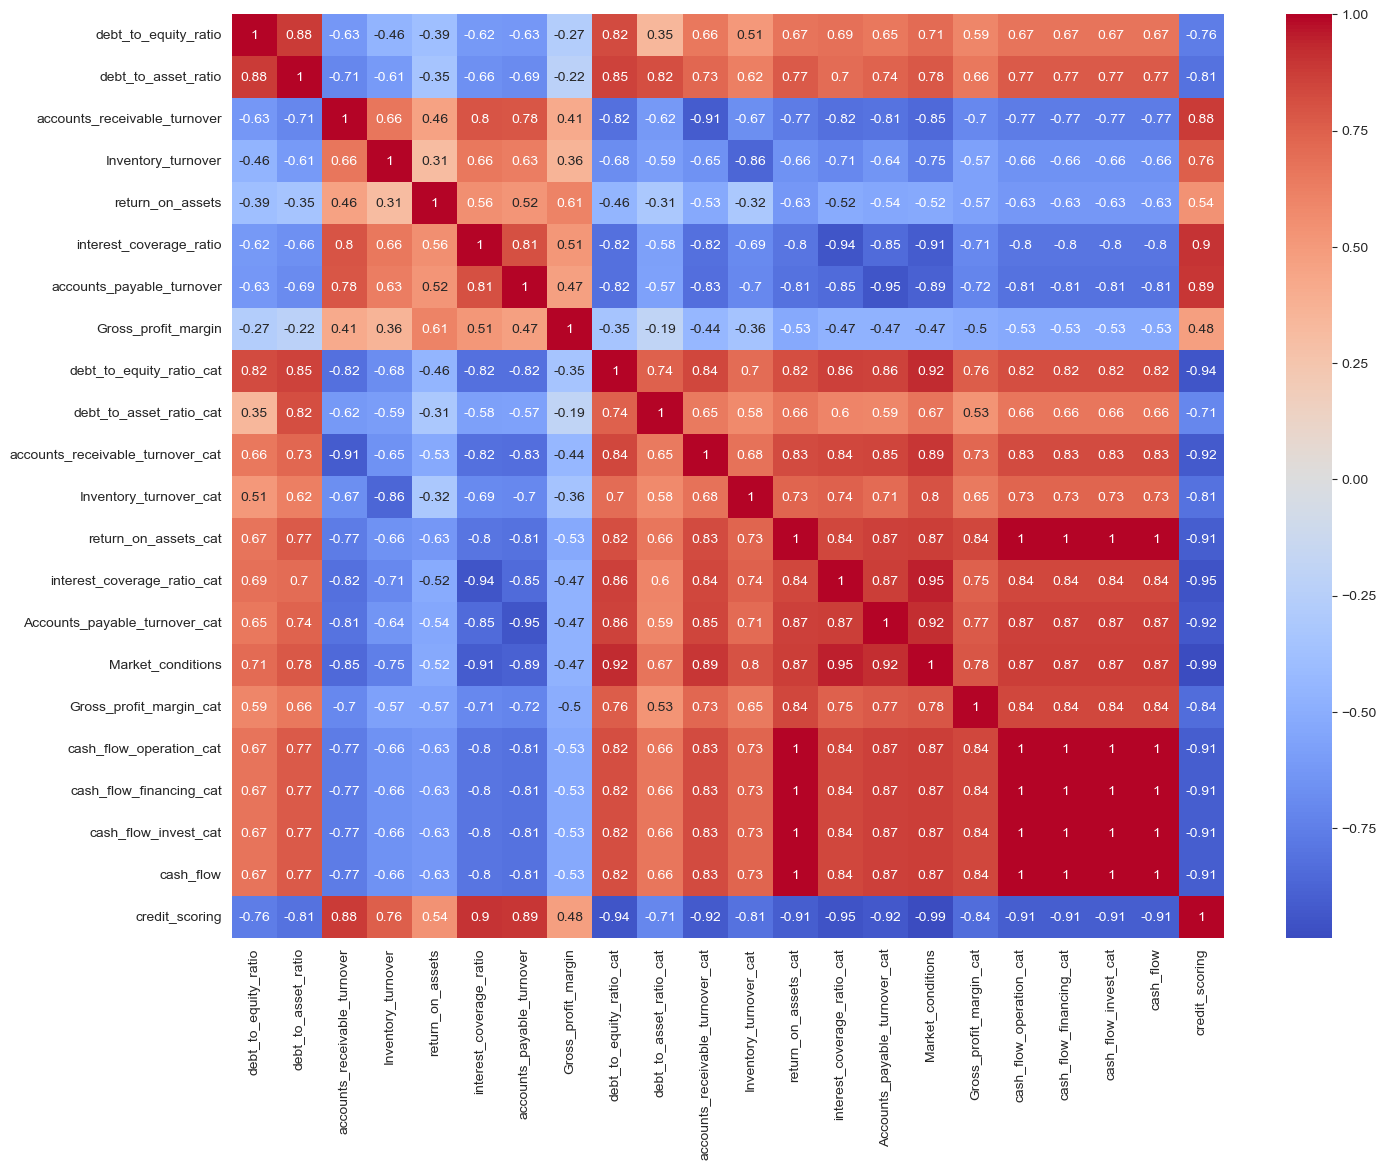

In [45]:
# heatmap correlation
plt.figure(figsize=(16, 12))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [46]:
# perbandingan antara data sebelum dan sesudah preprocessing
corr_compare = pd.DataFrame({
    'before': abs(corr_df['credit_scoring']),
    'after': abs(corr['credit_scoring'])
})

corr_compare.sort_values(by='after', ascending=False).head(20)

,before,after
credit_scoring,1.000000,1.000000
Market_conditions,NaN,0.986811
interest_coverage_ratio_cat,NaN,0.948256
debt_to_equity_ratio_cat,NaN,0.941370
Accounts_payable_turnover_cat,NaN,0.924797
accounts_receivable_turnover_cat,NaN,0.919284
cash_flow,NaN,0.908283
cash_flow_operation_cat,NaN,0.908283
cash_flow_financing_cat,NaN,0.908283
cash_flow_invest_cat,NaN,0.908283


#### Pengecekan Asumsi-Asumsi Regresi

In [47]:
X = preprocessed_df.drop(columns='credit_scoring')

##### Asumsi Normalitas

In [48]:
from statsmodels.stats.diagnostic import normal_ad
import statsmodels.api as sm

# Melakukan regresi dan memperoleh residual
X = preprocessed_df.drop(columns='credit_scoring')
y = preprocessed_df['credit_scoring']
X = sm.add_constant(X)
X[np.isnan(X)] = 100
model = sm.OLS(y, X).fit()
residuals = model.resid

# Menggunakan tes normalitas Anderson-Darling
p_value = normal_ad(residuals)[1]

# Interpretasi hasil tes normalitas
alpha = 0.05
if (p_value > alpha).all():
    print(p_value)
    print('Residual data terdistribusi normal')
else:
    print(p_value)
    print('Residual data tidak terdistribusi normal')

0.14383239752995583
Residual data terdistribusi normal


##### Asumsi Linearitas

In [49]:
import statsmodels.api as sm
from statsmodels.stats.diagnostic import linear_reset, het_goldfeldquandt

# Uji Ramsey RESET test
reset_result = linear_reset(model)
p_value = reset_result.pvalue
alpha = 0.05
if p_value > alpha:
    print(p_value)
    print('Model memenuhi asumsi linieritas berdasarkan uji Ramsey RESET test')
else:
    print(p_value)
    print('Model tidak memenuhi asumsi linieritas berdasarkan uji Ramsey RESET test')

0.0
Model tidak memenuhi asumsi linieritas berdasarkan uji Ramsey RESET test


##### Asumsi Independensi

In [50]:
import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson


# Menghitung nilai Durbin-Watson
dw = durbin_watson(model.resid)

# Interpretasi nilai Durbin-Watson
if dw < 2:
    print('Residual data berkorelasi positif')
elif dw > 2:
    print('Residual data berkorelasi negatif')
else:
    print('Residual data independen')

Residual data berkorelasi positif


In [51]:
##### Asumsi Homoskedastisitas

In [52]:
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan

# # Melakukan regresi
# X = preprocessed_df.drop(columns='credit_scoring')
# y = preprocessed_df['credit_score']
# X = sm.add_constant(X)
# model = sm.OLS(y, X).fit()

# Uji Breusch-Pagan
bp_result = het_breuschpagan(model.resid, model.model.exog)
p_value = bp_result[1]
if p_value > alpha:
    print('Model memenuhi asumsi homoskedastisitas berdasarkan uji Breusch-Pagan')
else:
    print('Model tidak memenuhi asumsi homoskedastisitas berdasarkan uji Breusch-Pagan')

Model memenuhi asumsi homoskedastisitas berdasarkan uji Breusch-Pagan


In [53]:
X

,const,debt_to_equity_ratio,debt_to_asset_ratio,accounts_receivable_turnover,Inventory_turnover,return_on_assets,interest_coverage_ratio,accounts_payable_turnover,Gross_profit_margin,debt_to_equity_ratio_cat,...,Inventory_turnover_cat,return_on_assets_cat,interest_coverage_ratio_cat,Accounts_payable_turnover_cat,Market_conditions,Gross_profit_margin_cat,cash_flow_operation_cat,cash_flow_financing_cat,cash_flow_invest_cat,cash_flow
0,1.0,0.033805,0.053030,0.703922,0.401215,0.833999,0.779315,0.647360,0.971823,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.027913,0.045696,0.643587,0.413877,0.827444,0.713380,0.660881,0.952583,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1.0,0.015800,0.028185,0.918487,0.407093,0.827444,0.917517,0.882663,0.952583,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1.0,0.090000,0.115331,0.667005,0.162189,0.827444,0.789944,0.720551,0.942822,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1.0,0.003222,0.006392,0.793023,0.393401,0.837271,0.921738,0.602081,0.952583,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1.0,100.000000,0.671449,0.249515,0.041687,0.791156,0.168082,0.216391,0.828570,2.0,...,2.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0
96,1.0,100.000000,0.552359,0.000000,0.094842,0.536050,0.333754,0.183452,0.892515,2.0,...,2.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0
97,1.0,100.000000,0.427877,0.039800,0.077693,0.589383,0.198100,0.153513,0.882140,2.0,...,2.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0
98,1.0,100.000000,0.752733,0.036901,0.139065,0.771193,0.265296,0.019532,0.932963,2.0,...,1.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0


##### Asumsi Nonmultikolinieritas

In [54]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Menghitung VIF
X[np.isnan(X)] = 1
vif = pd.DataFrame()
vif["variables"] = X.columns

vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Mencetak hasil VIF
print(vif)

# Mengecek apakah terdapat variabel yang memiliki VIF > 5
high_vif = vif[vif['VIF'] > 5]
if high_vif.shape[0] == 0:
    print('Model memenuhi asumsi nonmultikolinieritas')
else:
    print('Model tidak memenuhi asumsi nonmultikolinieritas karena variabel:', ', '.join(high_vif['variables'].tolist()), ' memiliki VIF > 5')

                           variables         VIF
0                              const  304.470181
1               debt_to_equity_ratio    5.544041
2                debt_to_asset_ratio    7.635906
3       accounts_receivable_turnover    7.167195
4                 Inventory_turnover    4.478520
5                   return_on_assets    2.359443
6            interest_coverage_ratio    1.317996
7          accounts_payable_turnover   11.229257
8                Gross_profit_margin    2.035521
9           debt_to_equity_ratio_cat   12.469181
10           debt_to_asset_ratio_cat    4.557139
11  accounts_receivable_turnover_cat   10.548243
12            Inventory_turnover_cat    6.331921
13              return_on_assets_cat         inf
14       interest_coverage_ratio_cat   12.440787
15     Accounts_payable_turnover_cat   16.954735
16                 Market_conditions   39.048073
17           Gross_profit_margin_cat    3.986090
18           cash_flow_operation_cat         inf
19           cash_fl

#### Splitting Data

In [55]:
X = preprocessed_df
y = df2['credit_scoring']
# y = df2['credit_score_category']

In [56]:
y

0     98.0
1     94.0
2     96.0
3     90.0
4     96.0
      ... 
95    30.0
96    30.0
97    25.5
98    31.5
99    27.0
Name: credit_scoring, Length: 100, dtype: float64

In [57]:
X = preprocessed_df.drop(columns='credit_scoring')
X

,debt_to_equity_ratio,debt_to_asset_ratio,accounts_receivable_turnover,Inventory_turnover,return_on_assets,interest_coverage_ratio,accounts_payable_turnover,Gross_profit_margin,debt_to_equity_ratio_cat,debt_to_asset_ratio_cat,...,Inventory_turnover_cat,return_on_assets_cat,interest_coverage_ratio_cat,Accounts_payable_turnover_cat,Market_conditions,Gross_profit_margin_cat,cash_flow_operation_cat,cash_flow_financing_cat,cash_flow_invest_cat,cash_flow
0,0.033805,0.053030,0.703922,0.401215,0.833999,0.779315,0.647360,0.971823,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.027913,0.045696,0.643587,0.413877,0.827444,0.713380,0.660881,0.952583,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.015800,0.028185,0.918487,0.407093,0.827444,0.917517,0.882663,0.952583,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.090000,0.115331,0.667005,0.162189,0.827444,0.789944,0.720551,0.942822,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.003222,0.006392,0.793023,0.393401,0.837271,0.921738,0.602081,0.952583,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,NaN,0.671449,0.249515,0.041687,0.791156,0.168082,0.216391,0.828570,2.0,2.0,...,2.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0
96,NaN,0.552359,0.000000,0.094842,0.536050,0.333754,0.183452,0.892515,2.0,2.0,...,2.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0
97,NaN,0.427877,0.039800,0.077693,0.589383,0.198100,0.153513,0.882140,2.0,2.0,...,2.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0
98,NaN,0.752733,0.036901,0.139065,0.771193,0.265296,0.019532,0.932963,2.0,2.0,...,1.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0


In [58]:
X[np.isnan(X)]=1

In [59]:
#import beberapa library yang dibutuhkan
import sklearn
from sklearn.model_selection import train_test_split

#membagi dataset menjadi 70:30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [60]:
X_train

,debt_to_equity_ratio,debt_to_asset_ratio,accounts_receivable_turnover,Inventory_turnover,return_on_assets,interest_coverage_ratio,accounts_payable_turnover,Gross_profit_margin,debt_to_equity_ratio_cat,debt_to_asset_ratio_cat,...,Inventory_turnover_cat,return_on_assets_cat,interest_coverage_ratio_cat,Accounts_payable_turnover_cat,Market_conditions,Gross_profit_margin_cat,cash_flow_operation_cat,cash_flow_financing_cat,cash_flow_invest_cat,cash_flow
55,0.033805,0.052058,0.531681,0.305200,0.824161,0.358788,0.371154,0.962250,0.0,1.0,...,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
88,0.700753,0.338202,0.056686,0.232467,0.686684,0.189219,0.080111,0.902783,2.0,1.0,...,1.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0
26,0.015800,0.024613,0.435352,0.353471,0.833999,0.651474,0.618025,0.952583,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
42,0.172180,0.183511,0.392910,0.252769,0.820876,0.545831,0.264877,0.932963,1.0,1.0,...,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
69,1.000000,0.489830,0.042674,0.083124,0.814294,0.256674,0.112198,0.923005,2.0,2.0,...,2.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,0.137939,0.158544,0.508294,0.313206,0.833999,0.426007,0.718998,0.952583,1.0,1.0,...,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
71,1.000000,0.394395,0.033976,0.054405,0.744385,0.221099,0.099643,0.912945,2.0,2.0,...,2.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0
14,0.039593,0.057383,0.656646,0.336673,0.847070,0.879077,0.950549,0.962250,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
92,0.558335,0.319869,0.107518,0.020996,0.794471,0.163148,0.056169,0.923005,2.0,1.0,...,2.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0



## D. Modeling

In [61]:
!pip install lazypredict

In [62]:
# import library yang dibutuhkan
import lazypredict
from lazypredict.Supervised import LazyRegressor

### 1. Regression

In [63]:
# mencoba model regresi
reg = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None, predictions=True)
models_reg, predictions_reg = reg.fit(X_train, X_test, y_train, y_test)
models_reg.sort_values(by='R-Squared', ascending=False)

100%|██████████| 42/42 [00:07<00:00,  5.91it/s]


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
LassoCV,1.00,1.00,0.43,0.37
LinearRegression,1.00,1.00,0.44,0.19
TransformedTargetRegressor,1.00,1.00,0.44,0.03
RANSACRegressor,1.00,1.00,0.44,0.08
BayesianRidge,1.00,1.00,0.44,0.04
RidgeCV,1.00,1.00,0.45,0.10
Ridge,1.00,1.00,0.54,0.02
SGDRegressor,1.00,1.00,0.56,0.04
HuberRegressor,1.00,1.00,0.63,0.16


***Pengerjaan Terakhir***

---

BestModel:
- LinearRegression
- TransformedTargetRegressor
- RANSACRegressor



#### LinearRegression

In [64]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()

In [65]:
LR.fit(X_train, y_train)

LinearRegression()

In [66]:
y_pred_LR = LR.predict(X_test)

In [67]:
num = 1

print(LR.predict(X_train.iloc[num].values.reshape(1, -1)))
print(y_train.iloc[num])

[30.39473061]
30.0


In [68]:
# meliihat rmse
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(y_test, y_pred_LR))
rmse

0.4426959480995024

In [69]:
mse = mean_squared_error(y_test, y_pred_LR)
mse

0.19597970246371735

In [70]:
# menampilkan hasil prediksi
score_train_LR = LR.score(X_train, y_train)
score_test_LR = LR.score(X_test, y_test)
print("Score Train:", score_train_LR)
print("Score Test:", score_test_LR)

Score Train: 0.9998505838547145
Score Test: 0.9997511248370422


#### TransformedTargetRegressor



In [71]:
from sklearn.compose import TransformedTargetRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PowerTransformer

In [72]:
transformer = PowerTransformer(method='yeo-johnson')
estimator = LinearRegression()

In [73]:
regr = TransformedTargetRegressor(regressor=estimator, transformer=transformer)
regr.fit(X, y)

TransformedTargetRegressor(regressor=LinearRegression(),
                           transformer=PowerTransformer())

In [74]:
# make predictions on the original target variable
y_pred_TTR = regr.predict(X)

In [75]:
# menampilkan hasil prediksi
score_train_TTR= regr.score(X_train, y_train)
score_test_TTR = regr.score(X_test, y_test)
print("Score Train:", score_train_TTR)
print("Score Test:", score_test_TTR)

Score Train: 0.9999735491405018
Score Test: 0.9999802095288982


#### RANSACRegressor

In [76]:
from sklearn.linear_model import RANSACRegressor


In [77]:
ransac = RANSACRegressor()
ransac.fit(X, y)

RANSACRegressor()

In [78]:
ransac = RANSACRegressor(random_state=42)
ransac.fit(X_train, y_train)

RANSACRegressor(random_state=42)

In [79]:
y_pred_ransac = ransac.predict(X_test)
mse = mean_squared_error(y_test, y_pred_ransac)
print(f"Mean squared error: {mse}")

Mean squared error: 0.19597970246371735


In [80]:
# menampilkan hasil prediksi
score_train_ransac= ransac.score(X_train, y_train)
score_test_ransac = ransac.score(X_test, y_test)
print("Score Train:", score_train_ransac)
print("Score Test:", score_test_ransac)

Score Train: 0.9998505838547145
Score Test: 0.9997511248370422


### Save Model

#### job lib

In [81]:
import joblib

In [82]:
joblib.dump(LR, 'LR.pkl')
joblib.dump(regr, 'regr.pkl')
joblib.dump(ransac,'ransac.pkl')

['ransac.pkl']

#### pickle

In [83]:
import pickle

pickle.dump(LR, open('LR_pickle.pkl', 'wb'))
pickle.dump(ransac, open('ransac_pickle.pkl', 'wb'))
pickle.dump(regr, open('regr_pickle.pkl', 'wb'))

### Test Model

#### joblib

In [84]:
# LR_import = joblib.load('LR.pkl')

#### pickle

In [85]:
LR_import = pickle.load(open('../model/LR_pickle.pkl', 'rb'))

In [86]:
LR_import

LinearRegression()

In [87]:
LR_import.feature_names_in_

array(['debt_to_equity_ratio', 'debt_to_asset_ratio',
       'accounts_receivable_turnover', 'Inventory_turnover',
       'return_on_assets', 'interest_coverage_ratio',
       'accounts_payable_turnover', 'Gross_profit_margin',
       'debt_to_equity_ratio_cat', 'debt_to_asset_ratio_cat',
       'accounts_receivable_turnover_cat', 'Inventory_turnover_cat',
       'return_on_assets_cat', 'interest_coverage_ratio_cat',
       'Accounts_payable_turnover_cat', 'Market_conditions',
       'Gross_profit_margin_cat', 'cash_flow_operation_cat',
       'cash_flow_financing_cat', 'cash_flow_invest_cat', 'cash_flow'],
      dtype=object)

In [88]:
X_test.iloc[0]

debt_to_equity_ratio               1.00
debt_to_asset_ratio                0.44
accounts_receivable_turnover       0.19
Inventory_turnover                 0.17
return_on_assets                   0.20
interest_coverage_ratio            0.00
accounts_payable_turnover          0.05
Gross_profit_margin                0.82
debt_to_equity_ratio_cat           2.00
debt_to_asset_ratio_cat            2.00
accounts_receivable_turnover_cat   2.00
Inventory_turnover_cat             1.00
return_on_assets_cat               1.00
interest_coverage_ratio_cat        2.00
Accounts_payable_turnover_cat      2.00
Market_conditions                  2.00
Gross_profit_margin_cat            2.00
cash_flow_operation_cat            1.00
cash_flow_financing_cat            1.00
cash_flow_invest_cat               1.00
cash_flow                          1.00
Name: 83, dtype: float64

In [89]:
X_test 

,debt_to_equity_ratio,debt_to_asset_ratio,accounts_receivable_turnover,Inventory_turnover,return_on_assets,interest_coverage_ratio,accounts_payable_turnover,Gross_profit_margin,debt_to_equity_ratio_cat,debt_to_asset_ratio_cat,...,Inventory_turnover_cat,return_on_assets_cat,interest_coverage_ratio_cat,Accounts_payable_turnover_cat,Market_conditions,Gross_profit_margin_cat,cash_flow_operation_cat,cash_flow_financing_cat,cash_flow_invest_cat,cash_flow
83,1.00,0.44,0.19,0.17,0.20,0.00,0.05,0.82,2.00,2.00,...,1.00,1.00,2.00,2.00,2.00,2.00,1.00,1.00,1.00,1.00
53,0.01,0.02,0.53,0.25,0.83,0.38,0.41,0.96,0.00,0.00,...,1.00,0.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00
70,1.00,0.39,0.08,0.00,0.67,0.41,0.13,0.76,2.00,2.00,...,2.00,1.00,1.00,2.00,2.00,2.00,1.00,1.00,1.00,1.00
45,0.17,0.18,0.45,0.16,0.83,0.55,0.49,0.94,1.00,1.00,...,1.00,0.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00
44,0.14,0.16,0.30,0.29,0.83,0.60,0.30,0.94,1.00,1.00,...,1.00,0.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00
39,0.14,0.16,0.50,0.35,0.87,0.52,0.28,0.95,1.00,1.00,...,1.00,0.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00
22,0.17,0.18,0.59,0.41,0.82,0.79,0.46,0.94,1.00,1.00,...,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00
80,0.25,0.23,0.13,0.18,0.29,0.06,0.00,0.51,2.00,1.00,...,1.00,1.00,2.00,2.00,2.00,2.00,1.00,1.00,1.00,1.00
10,0.00,0.00,0.72,0.46,0.83,0.75,0.51,0.99,0.00,0.00,...,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
0,0.03,0.05,0.70,0.40,0.83,0.78,0.65,0.97,0.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [90]:
preprocessed_df.head(83)

,debt_to_equity_ratio,debt_to_asset_ratio,accounts_receivable_turnover,Inventory_turnover,return_on_assets,interest_coverage_ratio,accounts_payable_turnover,Gross_profit_margin,debt_to_equity_ratio_cat,debt_to_asset_ratio_cat,...,return_on_assets_cat,interest_coverage_ratio_cat,Accounts_payable_turnover_cat,Market_conditions,Gross_profit_margin_cat,cash_flow_operation_cat,cash_flow_financing_cat,cash_flow_invest_cat,cash_flow,credit_scoring
0,0.03,0.05,0.70,0.40,0.83,0.78,0.65,0.97,0.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,98.00
1,0.03,0.05,0.64,0.41,0.83,0.71,0.66,0.95,0.00,1.00,...,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,94.00
2,0.02,0.03,0.92,0.41,0.83,0.92,0.88,0.95,0.00,0.00,...,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,96.00
3,0.09,0.12,0.67,0.16,0.83,0.79,0.72,0.94,0.00,1.00,...,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,90.00
4,0.00,0.01,0.79,0.39,0.84,0.92,0.60,0.95,0.00,0.00,...,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,96.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,NaN,0.43,0.19,0.00,0.77,0.17,0.10,0.88,2.00,2.00,...,1.00,2.00,2.00,2.00,2.00,1.00,1.00,1.00,1.00,25.50
79,NaN,0.43,0.08,0.09,0.77,0.17,0.23,0.91,2.00,2.00,...,1.00,2.00,2.00,2.00,2.00,1.00,1.00,1.00,1.00,25.50
80,0.25,0.23,0.13,0.18,0.29,0.06,0.00,0.51,2.00,1.00,...,1.00,2.00,2.00,2.00,2.00,1.00,1.00,1.00,1.00,30.00
81,0.22,0.21,0.14,0.03,0.75,0.10,0.02,0.89,1.00,1.00,...,1.00,2.00,2.00,2.00,2.00,1.00,1.00,1.00,1.00,31.50


In [91]:
df.head(1)

,debt_to_equity_ratio,debt_to_equity_ratio_cat,debt_to_asset_ratio,debt_to_asset_ratio_cat,accounts_receivable_turnover,accounts_receivable_turnover_cat,Inventory_turnover,Inventory_turnover_cat,return_on_assets,return_on_assets_cat,...,Inflation,stock_market_performance,Market_conditions,Gross_profit_margin,Gross_profit_margin_cat,cash_flow_operation_cat,cash_flow_financing_cat,cash_flow_invest_cat,cash_flow,credit_scoring
0,0.12,excellent,0.11,good,7.43,excellent,6.22,excellent,0.01,efesien,...,>10% (high),Bull market (pasar saham naik),Bullish market,0.04,excellent,Positive Cash Flow,Positive Cash Flow,Positive Cash Flow,Positive Cash Flow,98.00


## E. Evaluation